# Section 1: Import the data and do basic EDA

This python notebook will work exclusively on edrp_elec.csv data.

For Fin and Shruti, change your csv_path to open the file.

path for Fin: /Users/finbarrhodes/Documents/Capstone/EDRP/7591elec_filtered.csv

This chunk of code gets the ANON_ID that have 'ElecOnly' from the metafile.

dask library is needed

Preprocessing Steps:
- Limit to ElecOnly
- Limit to 2009
- Limit to ANON-IDs with measurements at all HH intervals

In [2]:
# !pip install dask
import dask.dataframe as dd

# Path to the CSV file
csv_path = r"/Users/finbarrhodes/Documents/Capstone/EDRP/csv/edrp_elec.csv"
# for Fin: /Users/finbarrhodes/Documents/Capstone/EDRP/csv/edrp_elec.csv


# Path to the output CSV file
output_path = r"/Users/finbarrhodes/Documents/Capstone/EDRP/7591elec_filtered.csv"
# for Fin: /Users/finbarrhodes/Documents/Capstone/EDRP/7591elec_filtered.csv

# Load the anonIDs with 'ElecOnly' fuel types
geo_path = r"/Users/finbarrhodes/Documents/Capstone/EDRP/csv/edrp_geography_data.xlsx"
# for Fin: /Users/finbarrhodes/Documents/Capstone/EDRP/csv/edrp_geography_data.xlsx
df_geo = pd.read_excel(geo_path)
elec_only_ids = set(df_geo[df_geo['fuelTypes'] == 'ElecOnly']['anonID'])

# Load the CSV file as a Dask DataFrame
df = dd.read_csv(csv_path)

# Filter the DataFrame based on the 'ANON_ID's
df_filtered = df[df['ANON_ID'].isin(elec_only_ids)]

# Save the filtered data to a new CSV file
df_filtered.to_csv(output_path, single_file=True, index=False)

print(f"Filtered data saved to: {output_path}")


Filtered data saved to: /Users/finbarrhodes/Documents/Capstone/EDRP/7591elec_filtered.csv


In [3]:
import pandas as pd

# Path to the CSV file
csv_path = r"/Users/finbarrhodes/Documents/Capstone/EDRP/7591elec_filtered.csv"

# Read the CSV into a DataFrame
df_filtered = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
print(df_filtered.head())


   ANON_ID   ADVANCEDATETIME  HH  ELECKWH
0     5110  15FEB08:12:30:00  25     0.60
1    11617  15FEB08:12:30:00  25     0.25
2     9015  15FEB08:12:30:00  25     0.40
3    11628  15FEB08:12:30:00  25     0.85
4    11158  15FEB08:12:30:00  25     0.20


In [4]:

# Ensure ADVANCEDATETIME is in datetime format
df_filtered['ADVANCEDATETIME'] = pd.to_datetime(df_filtered['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')

# Extract the year from ADVANCEDATETIME
df_filtered['Year'] = df_filtered['ADVANCEDATETIME'].dt.year

# Filter for rows where the year is 2009
df_2009 = df_filtered[df_filtered['Year'] == 2009]

# Output the 2009 data to a CSV file
output_path = r"/Users/finbarrhodes/Documents/Capstone/EDRP/7591elec_2009.csv"
df_2009.to_csv(output_path, index=False)

print(f"2009 data has been saved to: {output_path}")


2009 data has been saved to: /Users/finbarrhodes/Documents/Capstone/EDRP/7591elec_2009.csv


In [5]:
'''
import matplotlib.pyplot as plt

# Take the first 480 entries
df_123_selected_limited = df_123_selected.head(96)

# Plot ELECKWH vs ADVANCEDATETIME for the first 480 entries
plt.figure(figsize=(12, 6))
plt.plot(df_123_selected_limited['ADVANCEDATETIME'], df_123_selected_limited['ELECKWH'], marker='o')
plt.xlabel('Advanced Date Time')
plt.ylabel('Electricity Consumption (ELECKWH)')
plt.title('Electricity Consumption for ANON_ID 123 (First 96 Entries)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjusts plot to prevent clipping of labels
plt.show()
'''


"\nimport matplotlib.pyplot as plt\n\n# Take the first 480 entries\ndf_123_selected_limited = df_123_selected.head(96)\n\n# Plot ELECKWH vs ADVANCEDATETIME for the first 480 entries\nplt.figure(figsize=(12, 6))\nplt.plot(df_123_selected_limited['ADVANCEDATETIME'], df_123_selected_limited['ELECKWH'], marker='o')\nplt.xlabel('Advanced Date Time')\nplt.ylabel('Electricity Consumption (ELECKWH)')\nplt.title('Electricity Consumption for ANON_ID 123 (First 96 Entries)')\nplt.xticks(rotation=45)\nplt.grid(True)\nplt.tight_layout()  # Adjusts plot to prevent clipping of labels\nplt.show()\n"

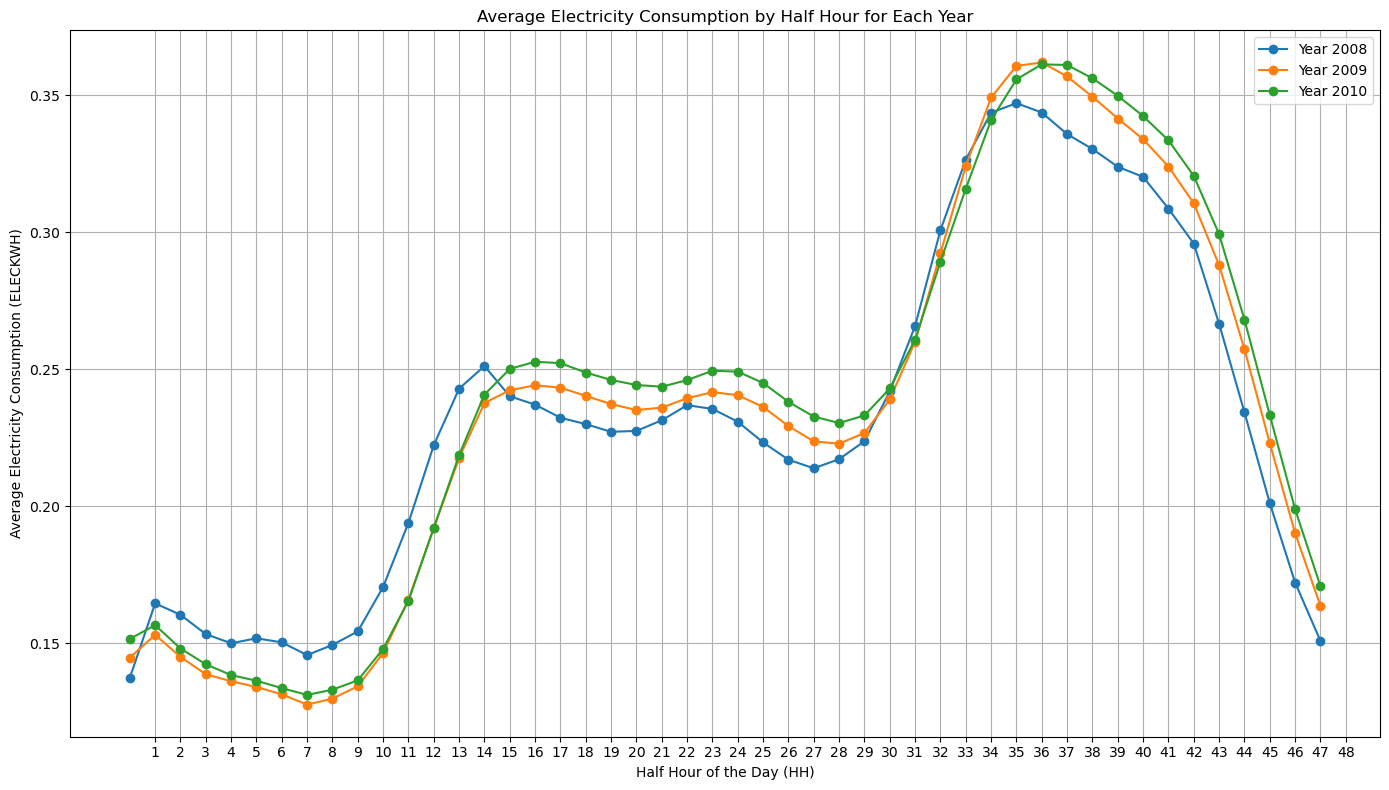

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure ADVANCEDATETIME is in datetime format
df_filtered['ADVANCEDATETIME'] = pd.to_datetime(df_filtered['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')

# Extract the year from ADVANCEDATETIME
df_filtered['Year'] = df_filtered['ADVANCEDATETIME'].dt.year

# Group by Year and HH, then calculate the average ELECKWH
df_avg_by_year_hh = df_filtered.groupby(['Year', 'HH'])['ELECKWH'].mean().reset_index()

# Plot the average ELECKWH for each year
plt.figure(figsize=(14, 8))

# Get unique years for plotting
years = sorted(df_avg_by_year_hh['Year'].unique())

# Plot each year's data
for year in years:
    year_data = df_avg_by_year_hh[df_avg_by_year_hh['Year'] == year]
    plt.plot(year_data['HH'], year_data['ELECKWH'], marker='o', label=f'Year {year}')

# Customize the plot
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average Electricity Consumption (ELECKWH)')
plt.title('Average Electricity Consumption by Half Hour for Each Year')
plt.xticks(range(1, 49))  # HH values range from 1 to 48
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()



In [7]:
'''
import pandas as pd
import matplotlib.pyplot as plt

# Ensure ADVANCEDATETIME is in datetime format
df['ADVANCEDATETIME'] = pd.to_datetime(df['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')

# Extract the year from ADVANCEDATETIME
df['Year'] = df['ADVANCEDATETIME'].dt.year

# Group by Year and HH, then calculate the average ELECKWH
df_avg_by_year_hh = df.groupby(['Year', 'HH'])['ELECKWH'].mean().reset_index()

# Plot the average ELECKWH for each year
plt.figure(figsize=(14, 8))

# Get unique years for plotting
years = sorted(df_avg_by_year_hh['Year'].unique())

# Plot each year's data
for year in years:
    year_data = df_avg_by_year_hh[df_avg_by_year_hh['Year'] == year]
    plt.plot(year_data['HH'], year_data['ELECKWH'], marker='o', label=f'Year {year}')

# Customize the plot
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average Electricity Consumption (ELECKWH)')
plt.title('Average Electricity Consumption by Half Hour for Each Year')
plt.xticks(range(1, 49))  # HH values range from 1 to 48
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()
'''


"\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Ensure ADVANCEDATETIME is in datetime format\ndf['ADVANCEDATETIME'] = pd.to_datetime(df['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')\n\n# Extract the year from ADVANCEDATETIME\ndf['Year'] = df['ADVANCEDATETIME'].dt.year\n\n# Group by Year and HH, then calculate the average ELECKWH\ndf_avg_by_year_hh = df.groupby(['Year', 'HH'])['ELECKWH'].mean().reset_index()\n\n# Plot the average ELECKWH for each year\nplt.figure(figsize=(14, 8))\n\n# Get unique years for plotting\nyears = sorted(df_avg_by_year_hh['Year'].unique())\n\n# Plot each year's data\nfor year in years:\n    year_data = df_avg_by_year_hh[df_avg_by_year_hh['Year'] == year]\n    plt.plot(year_data['HH'], year_data['ELECKWH'], marker='o', label=f'Year {year}')\n\n# Customize the plot\nplt.xlabel('Half Hour of the Day (HH)')\nplt.ylabel('Average Electricity Consumption (ELECKWH)')\nplt.title('Average Electricity Consumption by Half Hour for Each Year')\nplt.xticks(range

Plot for all ANONIDs the KWH throughout the day by month.

In [8]:
'''
import pandas as pd
import matplotlib.pyplot as plt

# Ensure ADVANCEDATETIME is in datetime format with the correct format
df['ADVANCEDATETIME'] = pd.to_datetime(df['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')

# Extract the month from ADVANCEDATETIME and create a new column for it
df['Month'] = df['ADVANCEDATETIME'].dt.month

# Group by Month and HH, then calculate the average ELECKWH
df_avg_by_month_hh = df.groupby(['Month', 'HH'])['ELECKWH'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(14, 8))

# Define a list of month names for labeling
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot each month
for month in range(1, 13):
    month_data = df_avg_by_month_hh[df_avg_by_month_hh['Month'] == month]
    plt.plot(month_data['HH'], month_data['ELECKWH'], marker='o', label=month_names[month - 1])

# Customize the plot
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average Electricity Consumption (ELECKWH)')
plt.title('Average Electricity Consumption by Half Hour for Each Month')
plt.xticks(range(1, 49))  # HH values range from 1 to 48
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()
'''

"\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Ensure ADVANCEDATETIME is in datetime format with the correct format\ndf['ADVANCEDATETIME'] = pd.to_datetime(df['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')\n\n# Extract the month from ADVANCEDATETIME and create a new column for it\ndf['Month'] = df['ADVANCEDATETIME'].dt.month\n\n# Group by Month and HH, then calculate the average ELECKWH\ndf_avg_by_month_hh = df.groupby(['Month', 'HH'])['ELECKWH'].mean().reset_index()\n\n# Plotting the data\nplt.figure(figsize=(14, 8))\n\n# Define a list of month names for labeling\nmonth_names = ['January', 'February', 'March', 'April', 'May', 'June',\n               'July', 'August', 'September', 'October', 'November', 'December']\n\n# Plot each month\nfor month in range(1, 13):\n    month_data = df_avg_by_month_hh[df_avg_by_month_hh['Month'] == month]\n    plt.plot(month_data['HH'], month_data['ELECKWH'], marker='o', label=month_names[month - 1])\n\n# Customize the plot\nplt.xlabel('Half

# Section 2: Create a reduced dataframe

Create a reduced dataframe with less ANONIDS for computational capacity.
Plot the average KWH per season throughout the day.

It would be useful to import the data from the complementary data: Accorn, Location, FuelType

Considerations:
* Drop from 23 Dec to 2 Jan because of difference in pattern.
* Each season has 3 months

In [9]:
"""
import pandas as pd

# Filter for ANON_IDs 1 to 5000
df100 = df_filtered[df_filtered['ANON_ID'].between(1, 5000)]

# Ensure ADVANCEDATETIME is in datetime format
df100['ADVANCEDATETIME'] = pd.to_datetime(df100['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S', errors='coerce')

# Extract the year and month
df100['Year'] = df100['ADVANCEDATETIME'].dt.year
df100['Month'] = df100['ADVANCEDATETIME'].dt.month

# Filter for summer months (May, June, July)
df100 = df100[df100['Month'].isin([5, 6, 7])]

# Keep the year with the most entries
most_common_year = df100['Year'].value_counts().idxmax()
df100 = df100[df100['Year'] == most_common_year]

# Drop unnecessary columns if no longer needed
df100 = df100.drop(columns=['Month', 'Year'])

# Define the columns to check for numeric values
columns_to_check = ['ANON_ID', 'HH', 'ELECKWH']
for col in columns_to_check:
    df100[col] = pd.to_numeric(df100[col], errors='coerce')
df100 = df100.dropna(subset=columns_to_check)
df100 = df100.reset_index(drop=True)

print(df100.head())
print(df100.shape)
"""

"\nimport pandas as pd\n\n# Filter for ANON_IDs 1 to 5000\ndf100 = df_filtered[df_filtered['ANON_ID'].between(1, 5000)]\n\n# Ensure ADVANCEDATETIME is in datetime format\ndf100['ADVANCEDATETIME'] = pd.to_datetime(df100['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S', errors='coerce')\n\n# Extract the year and month\ndf100['Year'] = df100['ADVANCEDATETIME'].dt.year\ndf100['Month'] = df100['ADVANCEDATETIME'].dt.month\n\n# Filter for summer months (May, June, July)\ndf100 = df100[df100['Month'].isin([5, 6, 7])]\n\n# Keep the year with the most entries\nmost_common_year = df100['Year'].value_counts().idxmax()\ndf100 = df100[df100['Year'] == most_common_year]\n\n# Drop unnecessary columns if no longer needed\ndf100 = df100.drop(columns=['Month', 'Year'])\n\n# Define the columns to check for numeric values\ncolumns_to_check = ['ANON_ID', 'HH', 'ELECKWH']\nfor col in columns_to_check:\n    df100[col] = pd.to_numeric(df100[col], errors='coerce')\ndf100 = df100.dropna(subset=columns_to_check)\ndf1

Plot the consumption per season throughout the day.

In [10]:
'''
# Plotting
plt.figure(figsize=(12, 6))
df100_avg_hh_season = df100_avg_hh_season.sort_values(by='HH').reset_index(drop=True)
seasons = [0, 1, 2, 3]
for season in seasons:
    season_data = df100_avg_hh_season[df100_avg_hh_season['Season'] == season]
    plt.plot(season_data['HH'], season_data['ELECKWH'], marker='o', label=f'Season {season}')

# Customize the plot
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average Electricity Consumption (ELECKWH)')
plt.title('Average Electricity Consumption by Half Hour for Each Season')
plt.xticks(range(0, 48))  # HH values range from 0 to 47
plt.grid(True)
plt.legend(title='Season')
plt.tight_layout()

# Show the plot
plt.show()
'''

"\n# Plotting\nplt.figure(figsize=(12, 6))\ndf100_avg_hh_season = df100_avg_hh_season.sort_values(by='HH').reset_index(drop=True)\nseasons = [0, 1, 2, 3]\nfor season in seasons:\n    season_data = df100_avg_hh_season[df100_avg_hh_season['Season'] == season]\n    plt.plot(season_data['HH'], season_data['ELECKWH'], marker='o', label=f'Season {season}')\n\n# Customize the plot\nplt.xlabel('Half Hour of the Day (HH)')\nplt.ylabel('Average Electricity Consumption (ELECKWH)')\nplt.title('Average Electricity Consumption by Half Hour for Each Season')\nplt.xticks(range(0, 48))  # HH values range from 0 to 47\nplt.grid(True)\nplt.legend(title='Season')\nplt.tight_layout()\n\n# Show the plot\nplt.show()\n"

## Section 2.1 Define a function that splits the day in 4 periods 
Split in 4 periods, calculate the mean accordingly per season. 

The periods are:
* 'bre' - breakfast: 6 - 10
* 'day' - day: 10.30 - 16
* 'eve' - evening: 16.30 - 22
* 'nig' - night: 22.30 - 5.30

In [11]:
import dask.dataframe as dd
import pandas as pd

# Ensure ADVANCEDATETIME is in datetime format
df_2009['ADVANCEDATETIME'] = dd.to_datetime(df_2009['ADVANCEDATETIME'], errors='coerce')

df_2009['Month'] = df_2009['ADVANCEDATETIME'].dt.month
df_2009['Weekend'] = df_2009['ADVANCEDATETIME'].dt.weekday.isin([5, 6]).astype(int)

# Define a function to assign HH to specific groups
def hh_group(hh):
    if 12 <= hh <= 20:
        return 'bre'  # Morning to Early Afternoon
    elif 21 <= hh <= 32:
        return 'day'  # Afternoon
    elif 33 <= hh <= 44:
        return 'eve'  # Evening
    else:
        return 'nig'  # Night

# Apply the hh_group function correctly using .map
df_2009['HH_Group'] = df_2009['HH'].map(hh_group)
# Group by ANON_ID, HH_Group, and Weekend, and calculate the average ELECKWH
df_2009_means = df_2009.groupby(['ANON_ID', 'HH_Group', 'Weekend'])['ELECKWH'].mean().reset_index()
# Rename the 'ELECKWH' column to 'KWH_by_SeasonTimeWknd'
df_2009_means = df_2009_means.rename(columns={'ELECKWH': 'KWH_by_SeasonTimeWknd'})

# Display the result
print(df_2009_means.head())

/var/folders/wq/pb9dbnn96x5gvb9hxyx_7jgr0000gn/T/ipykernel_1102/2282397421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009['ADVANCEDATETIME'] = dd.to_datetime(df_2009['ADVANCEDATETIME'], errors='coerce')
/var/folders/wq/pb9dbnn96x5gvb9hxyx_7jgr0000gn/T/ipykernel_1102/2282397421.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009['Month'] = df_2009['ADVANCEDATETIME'].dt.month
/var/folders/wq/pb9dbnn96x5gvb9hxyx_7jgr0000gn/T/ipykernel_1102/2282397421.py:8: SettingWithCopyWarning: 
A value 

   ANON_ID HH_Group  Weekend  KWH_by_SeasonTimeWknd
0        3      bre        0               0.290884
1        3      bre        1               0.266950
2        3      day        0               0.287621
3        3      day        1               0.258105
4        3      eve        0               0.365841


### Section 2.1.1 Based on Slovenian Paper, compute the features

Compute Relative Mean Consumption by HH_GROUP (bre, day, eve, nig) 

In [12]:
import pandas as pd

# Group by ANON_ID and HH_Group to compute the mean ELECKWH for each group
mean_by_group = (
    df_2009.groupby(['ANON_ID', 'HH_Group'])['ELECKWH']
    .mean()
    .reset_index()
)

# Compute the overall mean ELECKWH for each ANON_ID
mean_overall = (
    df_2009.groupby('ANON_ID')['ELECKWH']
    .mean()
    .reset_index()
)

mean_overall = mean_overall.rename(columns={'ELECKWH': 'Overall_Mean'})

# Merge the grouped mean with the overall mean
merged = mean_by_group.merge(mean_overall, on='ANON_ID')

# Calculate the Relative Mean Electricity (RME)
merged['RME'] = merged['ELECKWH'] / merged['Overall_Mean']

# Pivot the table to have RME_bre, RME_day, RME_eve, RME_nig as columns
df_rme = merged.pivot(index='ANON_ID', columns='HH_Group', values='RME').reset_index()

# Rename columns
df_rme = df_rme.rename(columns={ 'bre': 'RME_bre', 'day': 'RME_day', 'eve': 'RME_eve','nig': 'RME_nig' })

# Reset index to remove hierarchical indexing (if present)
df_rme.columns.name = None
df_rme = df_rme.fillna(0)

print(df_rme)

      ANON_ID   RME_bre   RME_day   RME_eve   RME_nig
0           3  1.014600  0.997251  1.314240  0.742570
1           5  1.548051  1.018036  1.309799  0.407756
2           6  1.343719  0.877835  1.341025  0.618434
3           7  0.851848  0.748313  1.895388  0.573931
4           8  1.290351  0.906572  1.523559  0.481390
...       ...       ...       ...       ...       ...
5514    16240  1.102340  1.136816  1.543669  0.393454
5515    16242  0.806457  1.198523  1.359375  0.669721
5516    16244  1.217834  0.993896  1.529121  0.450885
5517    16247  1.411151  1.173064  1.292764  0.356251
5518    16248  0.565076  0.860779  1.763247  0.762822

[5519 rows x 5 columns]


### Plot for a specific ANON_ID the average daily consumption

/var/folders/wq/pb9dbnn96x5gvb9hxyx_7jgr0000gn/T/ipykernel_1102/2170079543.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anon3['HH_Group'] = df_anon3['HH'].map(hh_group)


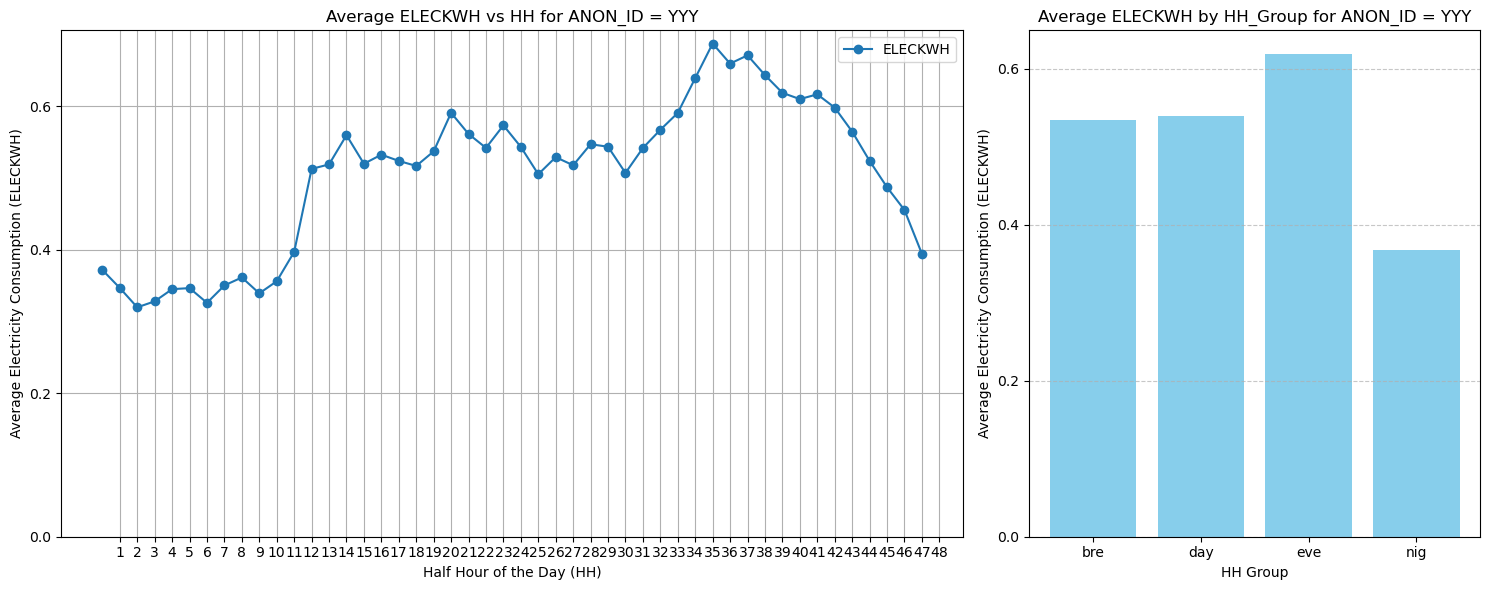

(12286, 8)


In [13]:
import matplotlib.pyplot as plt

# Step 1: Compute the average ELECKWH over time for each HH
df_anon3 = df_2009[df_2009['ANON_ID'] == 398]
average_eleckwh_by_hh = df_anon3.groupby('HH')['ELECKWH'].mean().reset_index()

# Step 2: Compute the average ELECKWH for each HH_Group for ANON_ID = 3
df_anon3['HH_Group'] = df_anon3['HH'].map(hh_group)
average_eleckwh_by_hh_group = df_anon3.groupby('HH_Group')['ELECKWH'].mean().reset_index()

# Plot both charts side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1]})

# Plot 1: Average ELECKWH vs HH for ANON_ID = 3
axes[0].plot(
    average_eleckwh_by_hh['HH'], 
    average_eleckwh_by_hh['ELECKWH'], 
    marker='o', linestyle='-', label='ELECKWH'
)
axes[0].set_title('Average ELECKWH vs HH for ANON_ID = YYY')
axes[0].set_xlabel('Half Hour of the Day (HH)')
axes[0].set_ylabel('Average Electricity Consumption (ELECKWH)')
axes[0].set_xticks(range(1, 49))  # HH ranges from 1 to 48
axes[0].set_yticks([0, 0.2, 0.4, 0.6])  # Define y-axis values
axes[0].grid(True)
axes[0].legend()

# Plot 2: Average ELECKWH by HH_Group for ANON_ID = 3
axes[1].bar(
    average_eleckwh_by_hh_group['HH_Group'], 
    average_eleckwh_by_hh_group['ELECKWH'], 
    color='skyblue'
)
axes[1].set_title('Average ELECKWH by HH_Group for ANON_ID = YYY')
axes[1].set_xlabel('HH Group')
axes[1].set_ylabel('Average Electricity Consumption (ELECKWH)')
axes[1].set_yticks([0, 0.2, 0.4, 0.6])  # Define y-axis values
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
print(df_anon3.shape)


/var/folders/wq/pb9dbnn96x5gvb9hxyx_7jgr0000gn/T/ipykernel_1102/3206067279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anon3['HH_Group'] = df_anon3['HH'].map(hh_group)


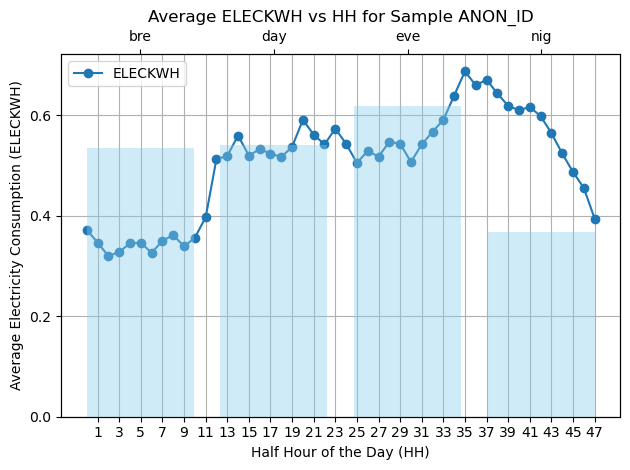

In [50]:
import matplotlib.pyplot as plt

# Step 1: Compute the average ELECKWH over time for each HH
df_anon3 = df_2009[df_2009['ANON_ID'] == 398]
average_eleckwh_by_hh = df_anon3.groupby('HH')['ELECKWH'].mean().reset_index()

# Step 2: Compute the average ELECKWH for each HH_Group for ANON_ID = 3
df_anon3['HH_Group'] = df_anon3['HH'].map(hh_group)
average_eleckwh_by_hh_group = df_anon3.groupby('HH_Group')['ELECKWH'].mean().reset_index()

# Plot both charts side by side
fig, ax1 = plt.subplots()

# Plot 1: Average ELECKWH vs HH for ANON_ID = 3
plt.plot(
    average_eleckwh_by_hh['HH'], 
    average_eleckwh_by_hh['ELECKWH'], 
    marker='o', linestyle='-', label='ELECKWH'
)
ax1.set_title('Average ELECKWH vs HH for Sample ANON_ID')
ax1.set_xlabel('Half Hour of the Day (HH)')
ax1.set_ylabel('Average Electricity Consumption (ELECKWH)')
ax1.set_xticks(range(1, 49, 2))  # HH ranges from 1 to 48
ax1.set_yticks([0, 0.2, 0.4, 0.6])  # Define y-axis values
ax1.grid(True)
ax1.legend(loc = "upper left")

ax2 = ax1.twiny()

# Overlaying by time-of-day
ax2.bar(
    average_eleckwh_by_hh_group['HH_Group'], 
    average_eleckwh_by_hh_group['ELECKWH'], 
    color='skyblue',
    alpha = .4
)
ax2.set_yticks([0, 0.2, 0.4, 0.6]) 
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Compute the Mean Relative Standard Deviation

In [14]:
import pandas as pd

# Group by ANON_ID and HH_Group to compute mean and standard deviation for ELECKWH
stats_by_group = (
    df_2009.groupby(['ANON_ID', 'HH_Group'])['ELECKWH']
    .agg(['mean', 'std'])
    .reset_index()
)

# Rename columns for clarity
stats_by_group = stats_by_group.rename(columns={'mean': 'ELECKWH_mean', 'std': 'ELECKWH_std'})

# Calculate the Relative Standard Deviation (RSD) for each group
stats_by_group['RSD'] = (stats_by_group['ELECKWH_std'] / stats_by_group['ELECKWH_mean'])

# Pivot the table to have RSD_bre, RSD_day, RSD_eve, RSD_nig as columns
df_rsd = stats_by_group.pivot(index='ANON_ID', columns='HH_Group', values='RSD').reset_index()

# Rename the columns for clarity
df_rsd = df_rsd.rename(columns={'bre': 'RSD_bre','day': 'RSD_day','eve': 'RSD_eve','nig': 'RSD_nig'})
df_rsd = df_rsd.fillna(0)

# Add a column for the average RSD across all HH_Groups
df_rsd['RSD_avg'] = df_rsd[['RSD_bre', 'RSD_day', 'RSD_eve', 'RSD_nig']].mean(axis=1)

# Display the final table
print(df_rsd.head())


HH_Group  ANON_ID   RSD_bre   RSD_day   RSD_eve   RSD_nig   RSD_avg
0               3  0.508761  0.503049  0.540020  0.455060  0.501722
1               5  1.275990  0.765921  0.629527  0.614572  0.821502
2               6  1.123006  0.673693  0.580991  0.367480  0.686293
3               7  1.136766  1.406779  0.841791  0.413808  0.949786
4               8  1.063746  1.087799  0.762323  0.592821  0.876672


In [15]:
len(df_rsd)

5519

Compute the Seasonal Score: 

In [16]:
'''
import pandas as pd

# Group by ANON_ID, HH_Group, and Season to compute the mean ELECKWH
season_means = df100.groupby(['ANON_ID', 'HH_Group', 'Season'])['ELECKWH'].mean().compute().reset_index()

# Pivot the table to have separate columns for summer (0) and winter (2) means
season_pivot = season_means.pivot_table(index=['ANON_ID', 'HH_Group'], columns='Season', values='ELECKWH').reset_index()

# Rename the columns for clarity
season_pivot = season_pivot.rename(columns={0: 'mean_summer', 2: 'mean_winter'})

# Fill missing values with 0 (in case some groups don't have data for summer or winter)
season_pivot = season_pivot.fillna(0)

# Calculate the overall mean for each HH_Group within each ANON_ID
overall_means = df100.groupby(['ANON_ID', 'HH_Group'])['ELECKWH'].mean().compute().reset_index()
overall_means = overall_means.rename(columns={'ELECKWH': 'mean_hh_group'})

# Merge the overall means with the season pivot table
merged = season_pivot.merge(overall_means, on=['ANON_ID', 'HH_Group'])

# Calculate the difference proportional to the average demand
merged['Difference'] = (merged['mean_winter'] - merged['mean_summer']) / merged['mean_hh_group']

# Group by ANON_ID and calculate the average difference across HH_Groups
df_season_diff = merged.groupby('ANON_ID')['Difference'].mean().reset_index()

# Rename the column for clarity
df_season_diff = df_season_diff.rename(columns={'Difference': 'Seasonal_Difference'})

# Display the final table
print(df_season_diff.head())
'''


"\nimport pandas as pd\n\n# Group by ANON_ID, HH_Group, and Season to compute the mean ELECKWH\nseason_means = df100.groupby(['ANON_ID', 'HH_Group', 'Season'])['ELECKWH'].mean().compute().reset_index()\n\n# Pivot the table to have separate columns for summer (0) and winter (2) means\nseason_pivot = season_means.pivot_table(index=['ANON_ID', 'HH_Group'], columns='Season', values='ELECKWH').reset_index()\n\n# Rename the columns for clarity\nseason_pivot = season_pivot.rename(columns={0: 'mean_summer', 2: 'mean_winter'})\n\n# Fill missing values with 0 (in case some groups don't have data for summer or winter)\nseason_pivot = season_pivot.fillna(0)\n\n# Calculate the overall mean for each HH_Group within each ANON_ID\noverall_means = df100.groupby(['ANON_ID', 'HH_Group'])['ELECKWH'].mean().compute().reset_index()\noverall_means = overall_means.rename(columns={'ELECKWH': 'mean_hh_group'})\n\n# Merge the overall means with the season pivot table\nmerged = season_pivot.merge(overall_means, o

Compute the Weekday vs Weekend Score

In [17]:
import pandas as pd

# Ensure 'ADVANCEDATETIME' is in datetime format
df_2009['ADVANCEDATETIME'] = pd.to_datetime(df_2009['ADVANCEDATETIME'], errors='coerce')

# Add 'Weekend' column (1 for weekend, 0 for weekday)
df_2009['Weekend'] = df_2009['ADVANCEDATETIME'].dt.weekday.isin([5, 6]).astype(int)

# Group by ANON_ID, HH_Group, and Weekend to compute the mean ELECKWH
weekend_means = (
    df_2009.groupby(['ANON_ID', 'HH_Group', 'Weekend'])['ELECKWH']
    .mean()
    .reset_index()
)

# Pivot the table to have separate columns for weekday (0) and weekend (1) means
weekend_pivot = (
    weekend_means.pivot_table(
        index=['ANON_ID', 'HH_Group'], 
        columns='Weekend', 
        values='ELECKWH'
    )
    .reset_index()
)

# Rename the columns for clarity
weekend_pivot = weekend_pivot.rename(columns={0: 'mean_weekday', 1: 'mean_weekend'})

# Fill missing values with 0 (in case some groups don't have data for weekdays or weekends)
weekend_pivot = weekend_pivot.fillna(0)

# Calculate the overall mean for each HH_Group within each ANON_ID
overall_means = (
    df_2009.groupby(['ANON_ID', 'HH_Group'])['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'mean_hh_group'})
)

# Merge the overall means with the weekday and weekend pivot table
merged = weekend_pivot.merge(overall_means, on=['ANON_ID', 'HH_Group'])

# Calculate the difference proportional to the average demand
merged['Difference'] = (merged['mean_weekend'] - merged['mean_weekday']) / merged['mean_hh_group']

# Group by ANON_ID and calculate the average difference across HH_Groups
df_weekday_weekend_diff = (
    merged.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Weekday_Weekend_Difference'})
)

# Display the final table
print(df_weekday_weekend_diff.head())


/var/folders/wq/pb9dbnn96x5gvb9hxyx_7jgr0000gn/T/ipykernel_1102/730301702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009['ADVANCEDATETIME'] = pd.to_datetime(df_2009['ADVANCEDATETIME'], errors='coerce')
/var/folders/wq/pb9dbnn96x5gvb9hxyx_7jgr0000gn/T/ipykernel_1102/730301702.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009['Weekend'] = df_2009['ADVANCEDATETIME'].dt.weekday.isin([5, 6]).astype(int)


   ANON_ID  Weekday_Weekend_Difference
0        3                   -0.055660
1        5                    0.133044
2        6                   -0.151421
3        7                    0.367156
4        8                    0.218854


In [18]:
len(df_weekday_weekend_diff)

5519

Join the dataframes to get per ANONID all the relevant features based only on its consumption.

In [19]:
import pandas as pd

# Ensure df_rsd only contains ANON_ID and RSD_avg
df_rsd_reduced = df_rsd[['ANON_ID', 'RSD_avg']]

# Merge df_rme with df_season_diff
df_2009_features = df_rme.merge(df_weekday_weekend_diff, on='ANON_ID', how='left')

# Merge with df_rsd_reduced to add RSD_avg
df_2009_features = df_2009_features.merge(df_rsd_reduced, on='ANON_ID', how='left')

# Rename the column for clarity
df_2009_features = df_2009_features.rename(columns={'Seasonal_Difference': 'SScore'})# Rename the column for clarity
df_2009_features = df_2009_features.rename(columns={'Weekday_Weekend_Difference': 'WScore'})

In [20]:
# Ensure ADVANCEDATETIME is a datetime object
df_2009['ADVANCEDATETIME'] = pd.to_datetime(df_2009['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S', errors='coerce')

# Extract the day from ADVANCEDATETIME
df_2009['Date'] = df_2009['ADVANCEDATETIME'].dt.date

# Compute daily max-min difference
daily_stats = df_2009.groupby(['ANON_ID', 'Date'])['ELECKWH'].agg(['max', 'min']).reset_index()
daily_stats['Daily_Max_Min_Diff'] = daily_stats['max'] - daily_stats['min'] 

# Compute the average daily max-min difference for each ANON_ID
avg_daily_diff = daily_stats.groupby('ANON_ID')['Daily_Max_Min_Diff'].mean().reset_index()
avg_daily_diff = avg_daily_diff.rename(columns={'Daily_Max_Min_Diff': 'Avg_Daily_Max_Min_Diff'})

# Compute the average ELECKWH for 'day' and 'eve' time periods
df_2009['HH_Group'] = df_2009['HH'].map(hh_group)  # Ensure HH_Group exists
df_day_eve = df_2009[df_2009['HH_Group'].isin(['day', 'eve'])]
day_eve_avg = df_day_eve.groupby(['ANON_ID', 'Date'])['ELECKWH'].mean().reset_index()
avg_day_eve = day_eve_avg.groupby('ANON_ID')['ELECKWH'].mean().reset_index()
avg_day_eve = avg_day_eve.rename(columns={'ELECKWH': 'Avg_Day_Eve'})

# Merge the new features into df_2009_features
df_2009_features = pd.merge(df_2009_features, avg_daily_diff, on='ANON_ID', how='left')
df_2009_features = pd.merge(df_2009_features, avg_day_eve, on='ANON_ID', how='left')

# Display the final df_2009_features DataFrame
display(df_2009_features)


/var/folders/wq/pb9dbnn96x5gvb9hxyx_7jgr0000gn/T/ipykernel_1102/798735786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009['ADVANCEDATETIME'] = pd.to_datetime(df_2009['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S', errors='coerce')
/var/folders/wq/pb9dbnn96x5gvb9hxyx_7jgr0000gn/T/ipykernel_1102/798735786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009['Date'] = df_2009['ADVANCEDATETIME'].dt.date
/var/folders/wq/pb9dbnn96x5gvb9hxyx_7jgr0000gn/T/ipykernel_1102/798735786.py:16: SettingWith

,ANON_ID,RME_bre,RME_day,RME_eve,RME_nig,WScore,RSD_avg,Avg_Daily_Max_Min_Diff,Avg_Day_Eve
0,3,1.014600,0.997251,1.314240,0.742570,-0.055660,0.501722,0.654396,0.334067
1,5,1.548051,1.018036,1.309799,0.407756,0.133044,0.821502,1.209939,0.248896
2,6,1.343719,0.877835,1.341025,0.618434,-0.151421,0.686293,0.302437,0.082383
3,7,0.851848,0.748313,1.895388,0.573931,0.367156,0.949786,0.994915,0.280867
4,8,1.290351,0.906572,1.523559,0.481390,0.218854,0.876672,0.990164,0.283485
...,...,...,...,...,...,...,...,...,...
5514,16240,1.102340,1.136816,1.543669,0.393454,0.018513,0.934395,1.265367,0.389339
5515,16242,0.806457,1.198523,1.359375,0.669721,-0.060555,0.540011,0.581133,0.312976
5516,16244,1.217834,0.993896,1.529121,0.450885,-0.175893,0.867892,0.534070,0.169274
5517,16247,1.411151,1.173064,1.292764,0.356251,-0.162733,1.545349,0.808732,0.125478


### Section 2.1.2 Get Accorn Group and merge it to all features
Outputs df100_features_comp with all the features for each ANON_ID

In [52]:
# Path to the Excel file
geo_path = r"/Users/finbarrhodes/Documents/Capstone/EDRP/csv/edrp_geography_data.xlsx"
# for G: "C:\Users\gerva\Downloads\edrp_geography_data.xlsx"
 # for Fin: "/Users/finbarrhodes/Documents/Capstone/EDRP/csv/edrp_geography_data.xlsx"
df_geo = pd.read_excel(geo_path)
# Rename the column 'anonID' to 'ANON_ID' to match df100
df_geo = df_geo.rename(columns={'anonID': 'ANON_ID'})
df_geo = df_geo[['ANON_ID', 'ACORN_Category', 'ACORN_Group', 'NUTS1']]

# Merge df100 with df_geo based on ANON_ID
df_2009_features_comp = pd.merge(df_2009_features, df_geo, on='ANON_ID', how='inner')

# Data cleaning
df_2009_features_comp = df_2009_features_comp.dropna(subset=['ACORN_Category', 'ACORN_Group', 'NUTS1'])
df_2009_features_comp['ACORN_Category'] = pd.to_numeric(df_2009_features_comp['ACORN_Category'], errors='coerce')
df_2009_features_comp = df_2009_features_comp[
    df_2009_features_comp['ACORN_Category'].between(1, 6) & 
    df_2009_features_comp['ACORN_Group'].isin(list('ABCDEFGHIJKLMNOPQRSTU'))
]

# Output the shape of the DataFrame
print(f"Shape of the processed DataFrame: {df_2009_features_comp.shape}")
print(f"Head of the processed DataFrame: {df_2009_features_comp.head()}")

Shape of the processed DataFrame: (5516, 12)
Head of the processed DataFrame:    ANON_ID   RME_bre   RME_day   RME_eve   RME_nig    WScore   RSD_avg  \
0        3  1.014600  0.997251  1.314240  0.742570 -0.055660  0.501722   
1        5  1.548051  1.018036  1.309799  0.407756  0.133044  0.821502   
2        6  1.343719  0.877835  1.341025  0.618434 -0.151421  0.686293   
3        7  0.851848  0.748313  1.895388  0.573931  0.367156  0.949786   
4        8  1.290351  0.906572  1.523559  0.481390  0.218854  0.876672   

   Avg_Daily_Max_Min_Diff  Avg_Day_Eve  ACORN_Category ACORN_Group NUTS1  
0                0.654396     0.334067             3.0           I   UKJ  
1                1.209939     0.248896             4.0           M   UKM  
2                0.302437     0.082383             3.0           H   UKJ  
3                0.994915     0.280867             3.0           I   UKF  
4                0.990164     0.283485             3.0           H   UKJ  


## Section 2.2 Correlation Heatmap and Pairplot

Correlation Heatmap with only numerical features

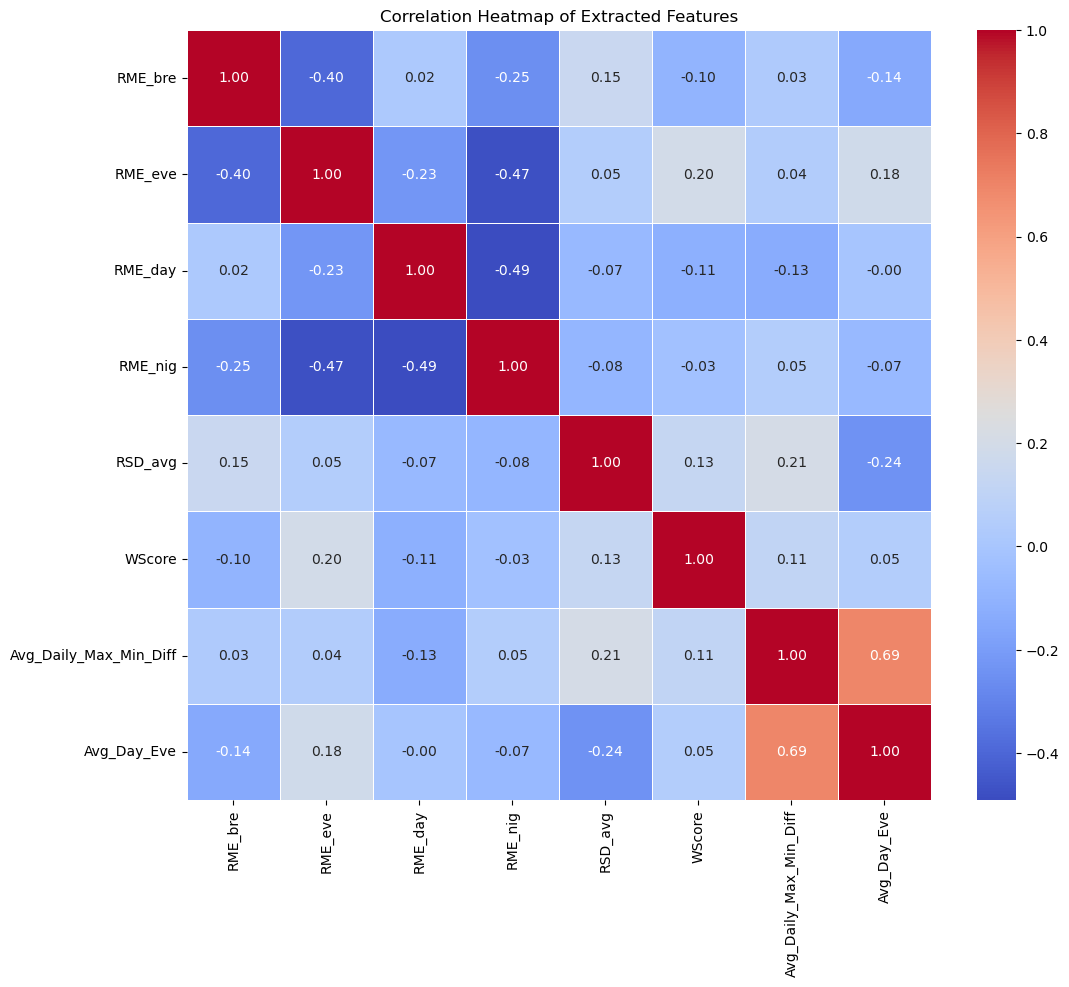

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# 1. Prepare the Data for Clustering
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
df_2009_features = df_2009_features.apply(pd.to_numeric, errors='coerce')
df_2009_features = df_2009_features[~df_2009_features.isna().any(axis=1)]
X = df_2009_features[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the Correlation Heatmap of Extracted Features
plt.figure(figsize=(12, 10))
corr = df_2009_features[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Extracted Features')
plt.show()

This next correlation heatmap includes categorical features


Lets filter only UKI (London) to get the weather out of the ecuation.

In [ ]:
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Filter the DataFrame for NUTS1 = 'UKI'
df_uki = df100_features[df100_features['NUTS1'] == 'UKI']
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore']
X = df_uki[features]
scaler = StandardScaler()
X_scaled_UKI = scaler.fit_transform(X)

# Plot the Correlation Heatmap of Extracted Features
plt.figure(figsize=(10, 8))
corr = df_uki[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Extracted Features for NUTS1 = UKI')
plt.show()
'''


## Section 2.3 Hierarchical Clustering on features

Hierarchical Clustering with Dendrograms.



### Section 2.3.1 Hierarchical Clustering with Complete

Using method = 'complete' in linkage to be robust against outliners.

In [53]:
df_2009_features = df_2009_features.apply(pd.to_numeric, errors='coerce')
df_2009_features = df_2009_features[~df_2009_features.isna().any(axis=1)]
np.sum(np.isnan(X_scaled))
#display(df_2009_features)

0

      ANON_ID  Cluster_HC
0           3          21
1           5          13
2           6          18
3           7          19
4           8          27
...       ...         ...
5514    16240          16
5515    16242          33
5516    16244          18
5517    16247          13
5518    16248          18

[5518 rows x 2 columns]
    Cluster_HC  Count
0            1      2
1            2      1
2            3      1
3            4      9
4            5     17
5            6     29
6            7     28
7            8      5
8            9     72
9           10     34
10          11      8
11          12      1
12          13    131
13          14    101
14          15     49
15          16   1027
16          17    194
17          18   1304
18          19    206
19          20    118
20          21    505
21          22    153
22          23     17
23          24      4
24          25     39
25          26     72
26          27    451
27          28     13
28          29      1
29 

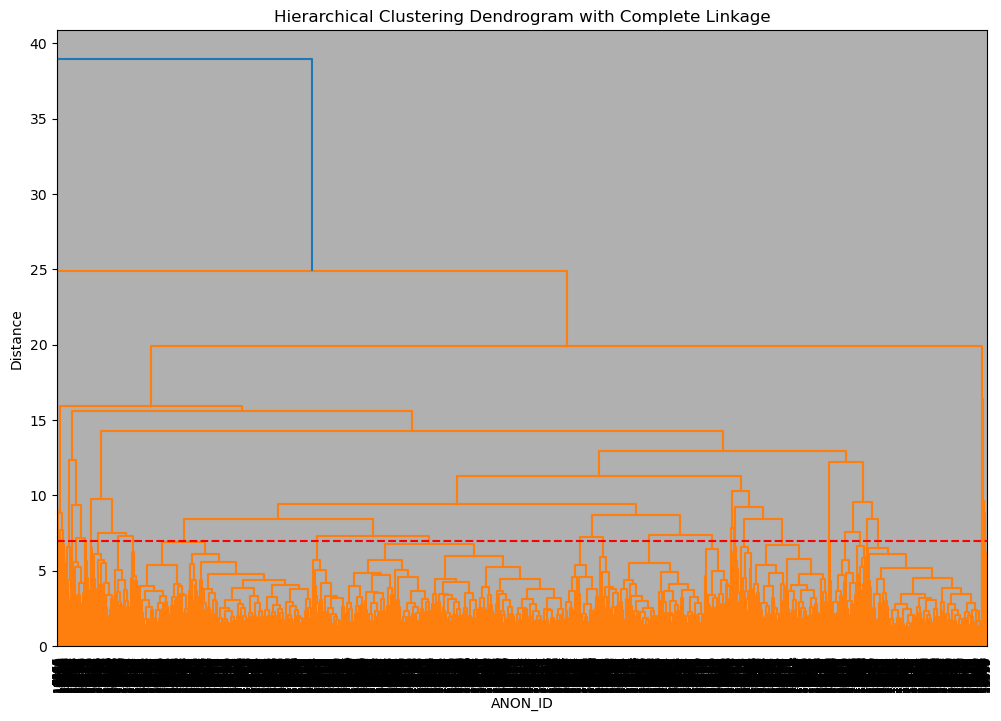

In [54]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster

# Assuming you have already standardized the data and performed hierarchical clustering
# features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'SScore', 'WScore']
# X_scaled is the standardized dataset

# Perform hierarchical clustering with complete linkage
linked = linkage(X_scaled, method='complete')

# Set the distance threshold and obtain cluster labels
distance_threshold = 7
cluster_labels = fcluster(linked, t=distance_threshold, criterion='distance')

# Add the cluster labels to the df100_features DataFrame
df_2009_features['Cluster_HC'] = cluster_labels

# Create a table with ANON_IDs and their assigned hierarchical cluster labels
cluster_table = df_2009_features[['ANON_ID', 'Cluster_HC']]

# Display the resulting table
print(cluster_table)


# Count the number of ANON_IDs per cluster
cluster_counts = df_2009_features['Cluster_HC'].value_counts().reset_index()
cluster_counts.columns = ['Cluster_HC', 'Count']

# Sort the clusters by Cluster_HC for better readability
cluster_counts = cluster_counts.sort_values(by='Cluster_HC').reset_index(drop=True)

# Display the resulting count table
print(cluster_counts)

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12, 8))
dendrogram(linked, labels=df_2009_features['ANON_ID'].values, leaf_rotation=90, leaf_font_size=8)
plt.axhline(y=distance_threshold, color='r', linestyle='--')  # Add a horizontal cut line at distance = 7
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
plt.xlabel('ANON_ID')
plt.ylabel('Distance')
plt.grid(True)
plt.show()



### Section 2.3.2 Remove the clusters that include only more than 30 ANON_IDs

Hierarchical Clustering with Dendrograms.

Using method = 'ward' in linkage to minimize variance

In [56]:
# Step 1: Identify clusters with less than 15 ANON_IDs
clusters_to_drop = cluster_counts[cluster_counts['Count'] < 15]['Cluster_HC'].tolist()
print(f"Clusters to be dropped: {clusters_to_drop}")

# Step 2: Identify ANON_IDs in those clusters
anon_ids_to_drop = df_2009_features[df_2009_features['Cluster_HC'].isin(clusters_to_drop)]['ANON_ID'].tolist()

# Step 3: Filter df100_features to exclude these ANON_IDs
df2009selected = df_2009_features[~df_2009_features['ANON_ID'].isin(anon_ids_to_drop)].copy()

# Reset the index of df100selected
df2009selected.reset_index(drop=True, inplace=True)

# Display information about the filtered DataFrame
print(f"Initial count of ANON_IDs: {len(df_2009_features['ANON_ID'])}")
print(f"Final count of ANON_IDs: {len(df2009selected['ANON_ID'])}")
print(df2009selected) 



Clusters to be dropped: [1, 2, 3, 4, 8, 11, 12, 24, 28, 29, 32, 34, 35, 36, 37, 39, 40]
Initial count of ANON_IDs: 5518
Final count of ANON_IDs: 5461
      ANON_ID   RME_bre   RME_day   RME_eve   RME_nig    WScore   RSD_avg  \
0           3  1.014600  0.997251  1.314240  0.742570 -0.055660  0.501722   
1           5  1.548051  1.018036  1.309799  0.407756  0.133044  0.821502   
2           6  1.343719  0.877835  1.341025  0.618434 -0.151421  0.686293   
3           7  0.851848  0.748313  1.895388  0.573931  0.367156  0.949786   
4           8  1.290351  0.906572  1.523559  0.481390  0.218854  0.876672   
...       ...       ...       ...       ...       ...       ...       ...   
5456    16240  1.102340  1.136816  1.543669  0.393454  0.018513  0.934395   
5457    16242  0.806457  1.198523  1.359375  0.669721 -0.060555  0.540011   
5458    16244  1.217834  0.993896  1.529121  0.450885 -0.175893  0.867892   
5459    16247  1.411151  1.173064  1.292764  0.356251 -0.162733  1.545349   
546

### Section 2.3.3 Perform Hierarchical clustering with XXXX method

Hierarchical Clustering with Dendrograms.

Using method = 'ward' in linkage to minimize variance

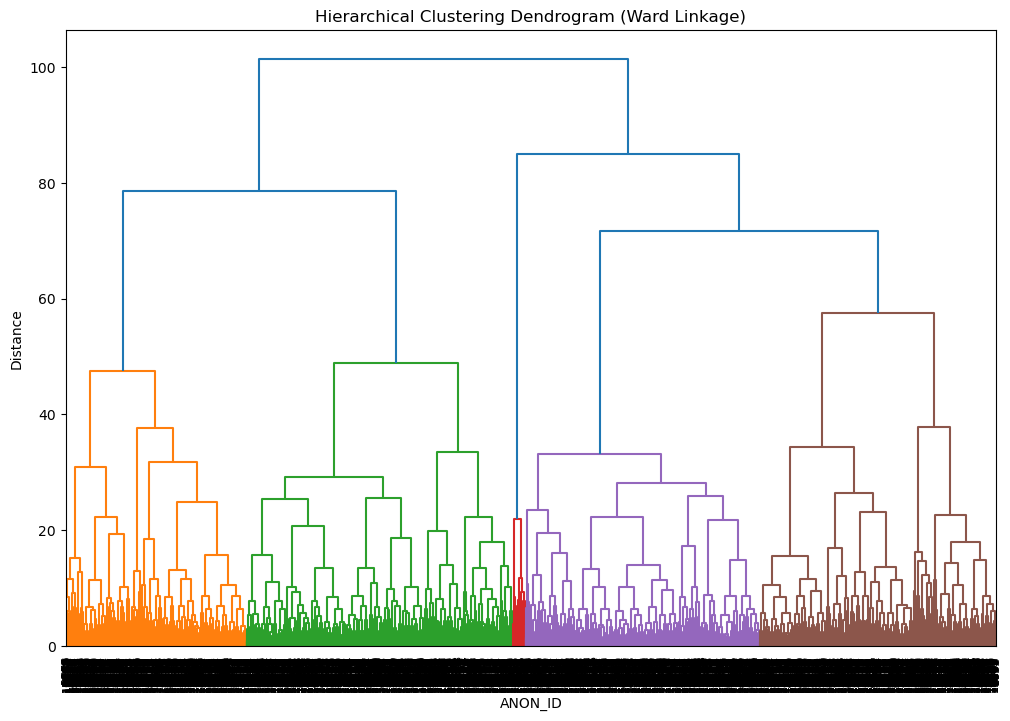

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# 1. Prepare the Data for Clustering
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
X = df2009selected[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ensure labels are aligned
labels = df2009selected['ANON_ID'].values

# Step 3: Perform Hierarchical Clustering using Ward Linkage
linked = linkage(X_scaled, method='ward')

# Step 4: Plot the Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    labels=labels,
    leaf_rotation=90,
    leaf_font_size=8
)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('ANON_ID')
plt.ylabel('Distance')
plt.show()

### Section 2.3.4 Evaluate AIC and BIC to define the optimal amount of clusters


Number of Clusters: 1, AIC: 95457.50148360687, BIC: 95748.13852050157
Number of Clusters: 2, AIC: 56642.77675052071, BIC: 57230.65621151225
Number of Clusters: 3, AIC: 51281.87790372728, BIC: 52166.99978881567
Number of Clusters: 4, AIC: 47888.25482316125, BIC: 49070.61913234649
Number of Clusters: 5, AIC: 47185.88392108698, BIC: 48665.49065436906
Number of Clusters: 6, AIC: 44715.345406115885, BIC: 46492.19456349481
Number of Clusters: 7, AIC: 43370.58118482249, BIC: 45444.67276629827
Number of Clusters: 8, AIC: 43027.573264124825, BIC: 45398.90726969745
Number of Clusters: 9, AIC: 42472.735948578484, BIC: 45141.31237824795
Number of Clusters: 10, AIC: 42276.08483724091, BIC: 45241.903691007225
Number of Clusters: 11, AIC: 42029.545697136884, BIC: 45292.606975000046
Number of Clusters: 12, AIC: 41925.727377907424, BIC: 45486.03107986743
Number of Clusters: 13, AIC: 41119.27623680182, BIC: 44976.82236285868
Number of Clusters: 14, AIC: 41185.466499884766, BIC: 45340.25505003847
Number 

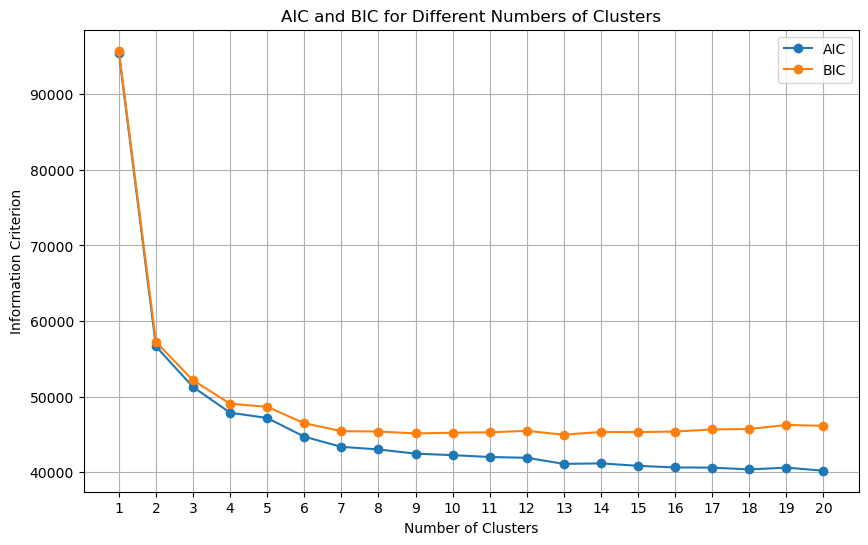

In [58]:
import os
os.environ["OMP_NUM_THREADS"] = "7"  # Adjust the number of threads if needed

# Then proceed with your imports and KMeans code
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# 1. Prepare the Data for Clustering
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
X = df2009selected[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range for the number of clusters
cluster_range = range(1, 21)

# Lists to store AIC and BIC values
aic_values = []
bic_values = []

# Fit GMM models and calculate AIC and BIC for each number of clusters
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X_scaled)
    aic_values.append(gmm.aic(X_scaled))
    bic_values.append(gmm.bic(X_scaled))
    print(f'Number of Clusters: {n_clusters}, AIC: {aic_values[-1]}, BIC: {bic_values[-1]}')

# Plot the AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, aic_values, marker='o', label='AIC')
plt.plot(cluster_range, bic_values, marker='o', label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for Different Numbers of Clusters')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()


Number of Clusters: 2, Silhouette Score: 0.22447446573266736
Number of Clusters: 3, Silhouette Score: 0.11177483554235215
Number of Clusters: 4, Silhouette Score: 0.002492769285581201
Number of Clusters: 5, Silhouette Score: 0.07099047285545024
Number of Clusters: 6, Silhouette Score: 0.03941219444482022
Number of Clusters: 7, Silhouette Score: 0.002793978113646126
Number of Clusters: 8, Silhouette Score: -0.0011144039586008453
Number of Clusters: 9, Silhouette Score: 0.005044039745097756
Number of Clusters: 10, Silhouette Score: -0.010356749320160043
Number of Clusters: 11, Silhouette Score: -0.008542094063208851
Number of Clusters: 12, Silhouette Score: -0.0011464379025554312
Number of Clusters: 13, Silhouette Score: -0.024098443916619642
Number of Clusters: 14, Silhouette Score: -0.023034335757512736
Number of Clusters: 15, Silhouette Score: -0.023361965367660352
Number of Clusters: 16, Silhouette Score: -0.043252598625861685
Number of Clusters: 17, Silhouette Score: -0.038714331901

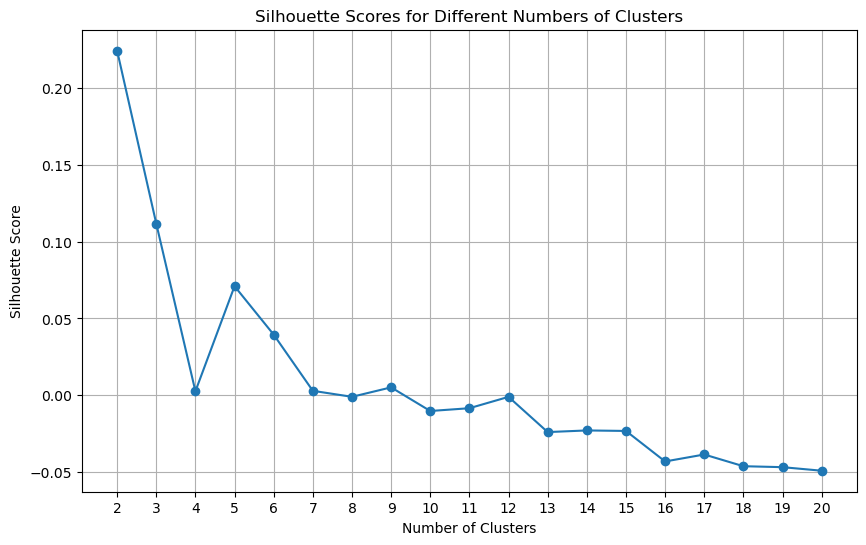

In [59]:
import os
os.environ["OMP_NUM_THREADS"] = "7"  # Adjust the number of threads if needed
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd

# Prepare the Data for Clustering
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
X = df2009selected[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range for the number of clusters
cluster_range = range(2, 21)  # Start with 2 clusters (minimum valid for silhouette score)

# Initialize a list to store results
results = []

# Loop through each number of clusters
for n_clusters in cluster_range:
    # Fit the GMM model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(X_scaled)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    
    # Append the results
    results.append({'Number of Clusters': n_clusters, 'Silhouette Score': silhouette_avg})

    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results as a table
print(results_df)

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(results_df['Number of Clusters'], results_df['Silhouette Score'], marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5461.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5461.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5461.
  res = hypotest_fun_out(*samples, **kwds)



Testing Gaussianity for feature: RME_bre
Shapiro-Wilk: {'Statistic': 0.9587503540501818, 'p-value': 8.704083840419034e-37}
Kolmogorov-Smirnov: {'Statistic': 0.06645363685597916, 'p-value': 2.0649439692124455e-21}
Anderson-Darling: {'Statistic': 41.43378805672182, 'Critical Values': array([0.576, 0.656, 0.786, 0.917, 1.091])}

Testing Gaussianity for feature: RME_eve
Shapiro-Wilk: {'Statistic': 0.984665551399754, 'p-value': 6.768072928641042e-24}
Kolmogorov-Smirnov: {'Statistic': 0.027397658656273693, 'p-value': 0.0005396683930651118}
Anderson-Darling: {'Statistic': 8.394805977228316, 'Critical Values': array([0.576, 0.656, 0.786, 0.917, 1.091])}

Testing Gaussianity for feature: RME_day
Shapiro-Wilk: {'Statistic': 0.9794842642226202, 'p-value': 2.1961848637395155e-27}
Kolmogorov-Smirnov: {'Statistic': 0.043526937678870836, 'p-value': 1.9872287688395968e-09}
Anderson-Darling: {'Statistic': 25.77377782633357, 'Critical Values': array([0.576, 0.656, 0.786, 0.917, 1.091])}


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5461.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5461.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5461.
  res = hypotest_fun_out(*samples, **kwds)



Testing Gaussianity for feature: RME_nig
Shapiro-Wilk: {'Statistic': 0.8264695658370381, 'p-value': 1.0347520939508042e-60}
Kolmogorov-Smirnov: {'Statistic': 0.09771391822221309, 'p-value': 7.730897579416799e-46}
Anderson-Darling: {'Statistic': 122.75753019732838, 'Critical Values': array([0.576, 0.656, 0.786, 0.917, 1.091])}

Testing Gaussianity for feature: RSD_avg
Shapiro-Wilk: {'Statistic': 0.9462770446720348, 'p-value': 1.0080813738592668e-40}
Kolmogorov-Smirnov: {'Statistic': 0.0618698477712577, 'p-value': 1.2922268273270602e-18}
Anderson-Darling: {'Statistic': 50.57300476102773, 'Critical Values': array([0.576, 0.656, 0.786, 0.917, 1.091])}

Testing Gaussianity for feature: WScore
Shapiro-Wilk: {'Statistic': 0.9505286772986259, 'p-value': 1.7957861432294193e-39}
Kolmogorov-Smirnov: {'Statistic': 0.07635460518614068, 'p-value': 3.8916704918738267e-28}
Anderson-Darling: {'Statistic': 63.687694947202544, 'Critical Values': array([0.576, 0.656, 0.786, 0.917, 1.091])}


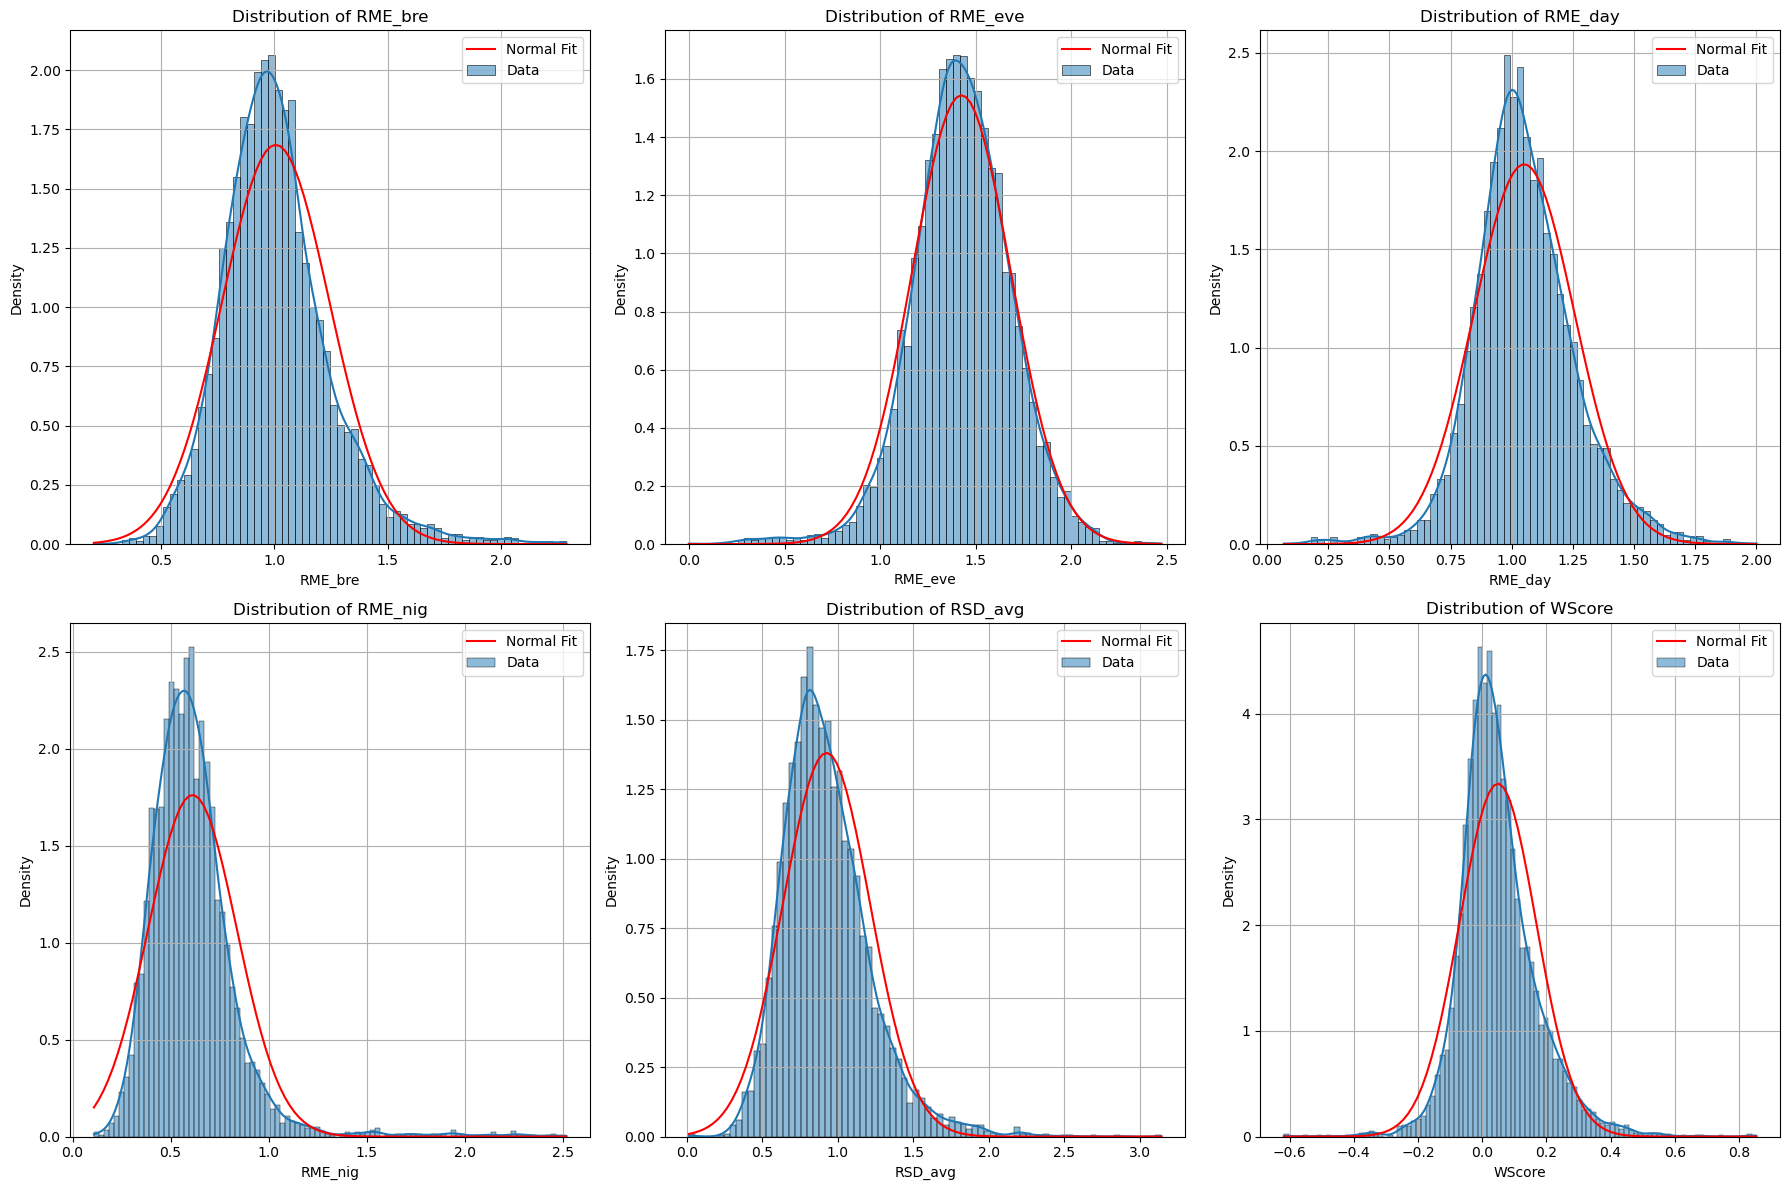

In [60]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, kstest, anderson, probplot
import matplotlib.pyplot as plt
import seaborn as sns

# Example features dataset
# Replace `df_features` with your DataFrame and list of features
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore']  # 'SScore' excluded
df2009selected_features = df2009selected
X = df2009selected_features[features]

# Function to test Gaussianity
def test_gaussianity(feature_data):
    results = {}

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = shapiro(feature_data)
    results['Shapiro-Wilk'] = {'Statistic': shapiro_stat, 'p-value': shapiro_p}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = kstest(feature_data, 'norm', args=(feature_data.mean(), feature_data.std()))
    results['Kolmogorov-Smirnov'] = {'Statistic': ks_stat, 'p-value': ks_p}

    # Anderson-Darling Test
    anderson_result = anderson(feature_data)
    results['Anderson-Darling'] = {'Statistic': anderson_result.statistic, 'Critical Values': anderson_result.critical_values}

    return results

# Visualize all features in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    # Drop NaN values for the feature
    feature_data = X[feature].dropna()

    # Run Gaussianity tests
    results = test_gaussianity(feature_data)
    print(f"\nTesting Gaussianity for feature: {feature}\n{'=' * 40}")
    for test_name, result in results.items():
        print(f"{test_name}: {result}")
    
    # Plot histogram with KDE and Q-Q plot
    ax = axes[i]
    sns.histplot(feature_data, kde=True, stat="density", label="Data", ax=ax)
    x = np.linspace(feature_data.min(), feature_data.max(), 100)
    normal_curve = np.exp(-0.5 * ((x - feature_data.mean()) / feature_data.std())**2) / (feature_data.std() * np.sqrt(2 * np.pi))
    ax.plot(x, normal_curve, label="Normal Fit", color='red')
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid()

# Remove any unused axes (in case of fewer than 6 features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Anderson-Darling Normality test: For datasets smaller than 500 entries, the feature follows a normal distribution
# when the statistic is less than 0.6

### Section 2.3.5 Get table with count of ANON_ID per cluster

Now that I identified that 6 is the optimal number of clusters, lets fit the GMM and see how many IDs per cluster, and their attributes

In [61]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd
# 1. Prepare the Data for Clustering
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
X = df2009selected[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Gaussian Mixture Model with 6 clusters
gmm = GaussianMixture(n_components=9, random_state=42)  # INPUT THE OPTIMAL NUMBER OF CLUSTERS
df2009selected_features['Cluster'] = gmm.fit_predict(X_scaled)

# Count the number of consumers per cluster
cluster_counts = df2009selected_features['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Number_of_Consumers']

# Sort the clusters for better readability
cluster_counts = cluster_counts.sort_values(by='Cluster').reset_index(drop=True)

# Display the cluster counts
display(cluster_counts)


,Cluster,Number_of_Consumers
0,0,283
1,1,809
2,2,167
3,3,74
4,4,418
5,5,274
6,6,1489
7,7,196
8,8,1751


In [62]:
df2009selected_features

,ANON_ID,RME_bre,RME_day,RME_eve,RME_nig,WScore,RSD_avg,Avg_Daily_Max_Min_Diff,Avg_Day_Eve,Cluster_HC,Cluster
0,3,1.014600,0.997251,1.314240,0.742570,-0.055660,0.501722,0.654396,0.334067,21,8
1,5,1.548051,1.018036,1.309799,0.407756,0.133044,0.821502,1.209939,0.248896,13,1
2,6,1.343719,0.877835,1.341025,0.618434,-0.151421,0.686293,0.302437,0.082383,18,6
3,7,0.851848,0.748313,1.895388,0.573931,0.367156,0.949786,0.994915,0.280867,19,8
4,8,1.290351,0.906572,1.523559,0.481390,0.218854,0.876672,0.990164,0.283485,27,8
...,...,...,...,...,...,...,...,...,...,...,...
5456,16240,1.102340,1.136816,1.543669,0.393454,0.018513,0.934395,1.265367,0.389339,16,8
5457,16242,0.806457,1.198523,1.359375,0.669721,-0.060555,0.540011,0.581133,0.312976,33,8
5458,16244,1.217834,0.993896,1.529121,0.450885,-0.175893,0.867892,0.534070,0.169274,18,6
5459,16247,1.411151,1.173064,1.292764,0.356251,-0.162733,1.545349,0.808732,0.125478,13,2


### Section 2.3.6 Get table with the mean value of the features per Cluster

In [63]:
# Define the selected attributes for which we want to calculate the mean
# selected_attributes = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'SScore', 'WScore']
selected_attributes = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
# Group by Cluster and calculate the mean for each attribute
cluster_means = df2009selected_features.groupby('Cluster')[selected_attributes].mean().reset_index()
cluster_means = cluster_means.round(2)
# Display the resulting DataFrame
display(cluster_means)


,Cluster,RME_bre,RME_eve,RME_day,RME_nig,RSD_avg,WScore,Avg_Daily_Max_Min_Diff,Avg_Day_Eve
0,0,0.90,1.56,1.00,0.61,0.72,0.05,1.12,0.50
1,1,1.19,1.33,1.06,0.57,1.22,0.05,1.12,0.23
2,2,1.02,1.32,1.07,0.67,1.32,0.06,0.41,0.10
3,3,0.98,1.16,0.95,0.82,1.39,0.03,1.20,0.28
4,4,0.97,1.60,0.98,0.55,1.04,0.14,0.76,0.21
5,5,0.90,1.15,0.88,1.03,0.95,0.02,1.61,0.53
6,6,1.02,1.37,1.11,0.60,0.81,0.01,0.56,0.18
7,7,1.04,1.40,1.17,0.46,0.98,0.04,0.76,0.22
8,8,0.95,1.52,1.04,0.59,0.83,0.07,1.10,0.38


### Section 2.3.7 PCA w 2 components to evaluate the disimilarity of all clusters

[0.23967521 0.20427559]


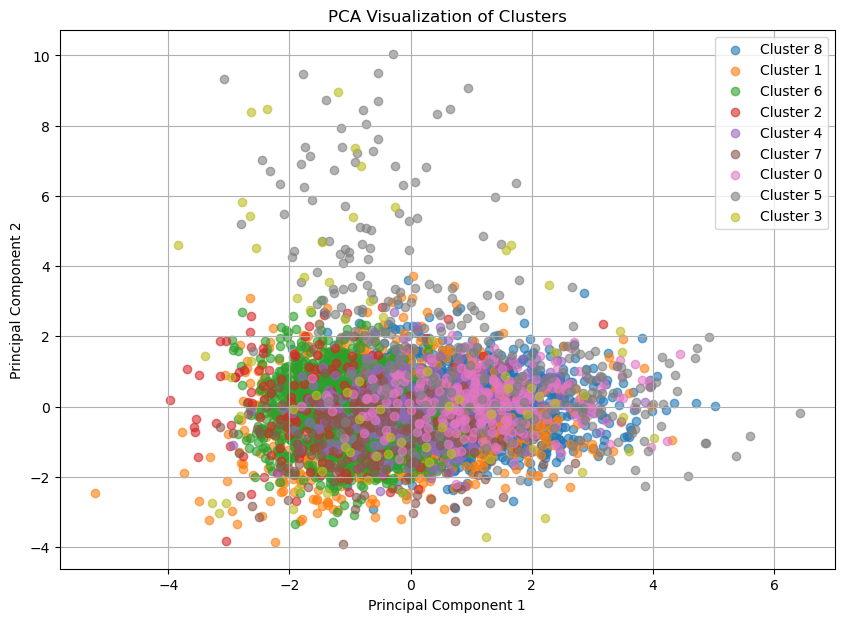

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the selected features for PCA
features = ['RME_bre', 'RME_eve', 'RME_day', 'RME_nig', 'RSD_avg', 'WScore', 'Avg_Daily_Max_Min_Diff', 'Avg_Day_Eve']
X = df2009selected_features[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results and the cluster labels
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df2009selected_features['Cluster']

# Plot the PCA-transformed data with cluster labels
plt.figure(figsize=(10, 7))
for cluster in df_pca['Cluster'].unique():
    plt.scatter(
        df_pca[df_pca['Cluster'] == cluster]['PCA1'],
        df_pca[df_pca['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )
print(pca.explained_variance_ratio_)


# Add plot details
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


### Section 2.3.7 PCA w 2 components to evaluate the disimilarity of selected clusters

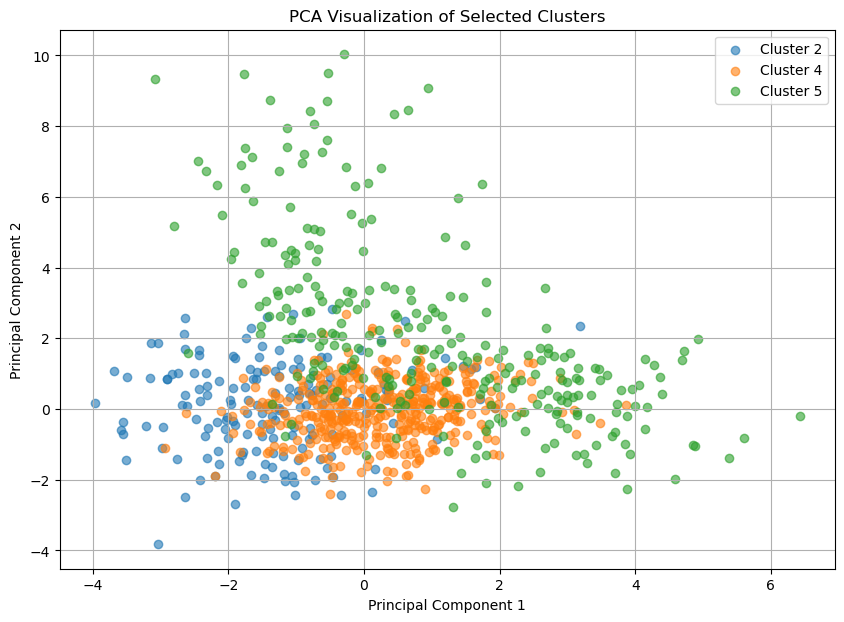

In [65]:
import matplotlib.pyplot as plt

# Filter the DataFrame to keep only clusters 1, 2, 4, and 7
clusters_to_plot = [2, 4, 5]
df_pca_filtered = df_pca[df_pca['Cluster'].isin(clusters_to_plot)]

# Plot the PCA-transformed data with the specified cluster labels
plt.figure(figsize=(10, 7))
for cluster in clusters_to_plot:
    plt.scatter(
        df_pca_filtered[df_pca_filtered['Cluster'] == cluster]['PCA1'],
        df_pca_filtered[df_pca_filtered['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

# Add plot details
plt.title('PCA Visualization of Selected Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


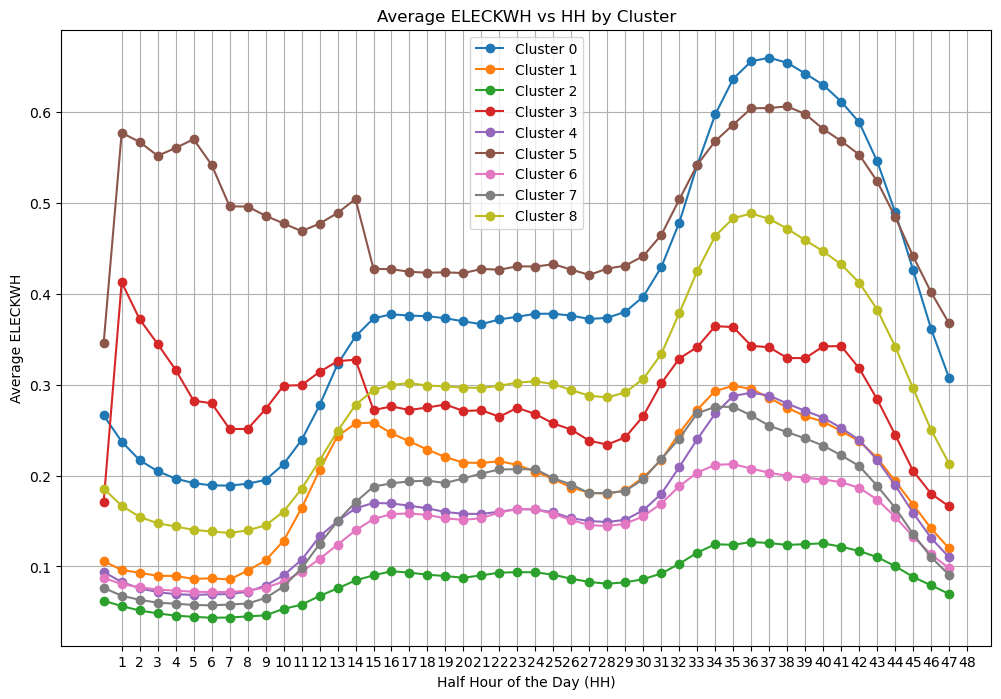

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge cluster information back into the original data (if not already included)
df_with_clusters = df_2009.merge(
    df2009selected_features[['ANON_ID', 'Cluster']],
    on='ANON_ID',
    how='inner'
)

# Group by Cluster and HH, and calculate the mean ELECKWH
clustered_means = df_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH'].mean().reset_index()

# Plot each cluster
plt.figure(figsize=(12, 8))
for cluster in clustered_means['Cluster'].unique():
    cluster_data = clustered_means[clustered_means['Cluster'] == cluster]
    plt.plot(cluster_data['HH'], cluster_data['ELECKWH'], label=f'Cluster {cluster}', marker='o')

# Plot details
plt.title('Average ELECKWH vs HH by Cluster')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


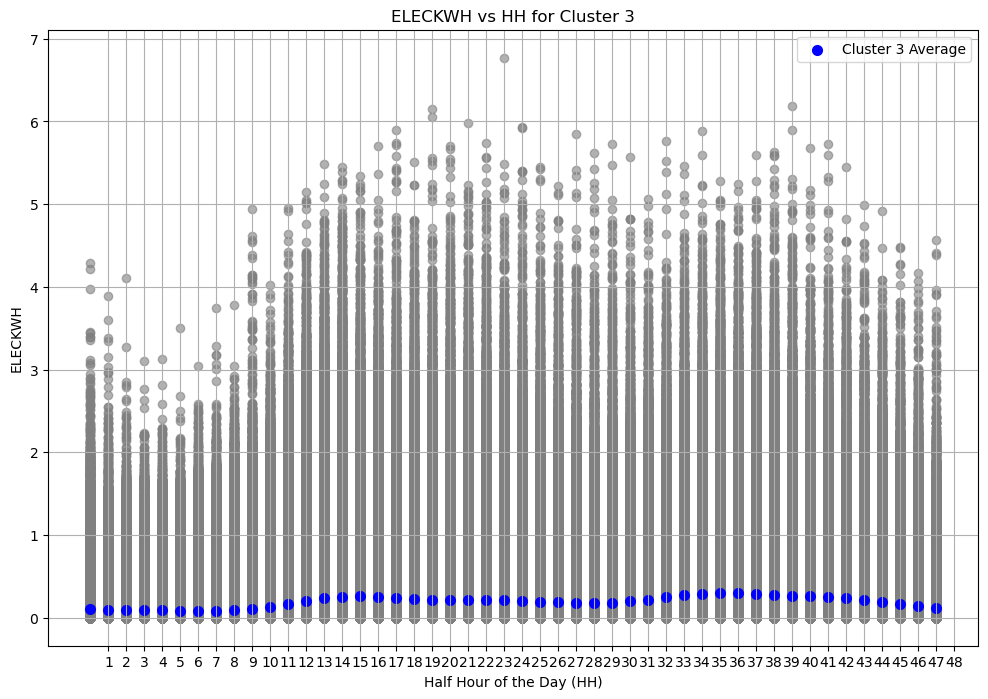

In [67]:
import matplotlib.pyplot as plt

# Filter the data for Cluster 3
cluster_3_data = df_with_clusters[df_with_clusters['Cluster'] == 1]

# Plot all ANON_IDs in grey
plt.figure(figsize=(12, 8))
for anon_id in cluster_3_data['ANON_ID'].unique():
    anon_data = cluster_3_data[cluster_3_data['ANON_ID'] == anon_id]
    plt.scatter(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.6)

# Calculate the average ELECKWH for Cluster 3 by HH
cluster_3_avg = cluster_3_data.groupby('HH')['ELECKWH'].mean().reset_index()

# Plot the average for Cluster 3 in blue
plt.scatter(cluster_3_avg['HH'], cluster_3_avg['ELECKWH'], color='blue', linewidth=2, label='Cluster 3 Average')

# Plot details
plt.title('ELECKWH vs HH for Cluster 3')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


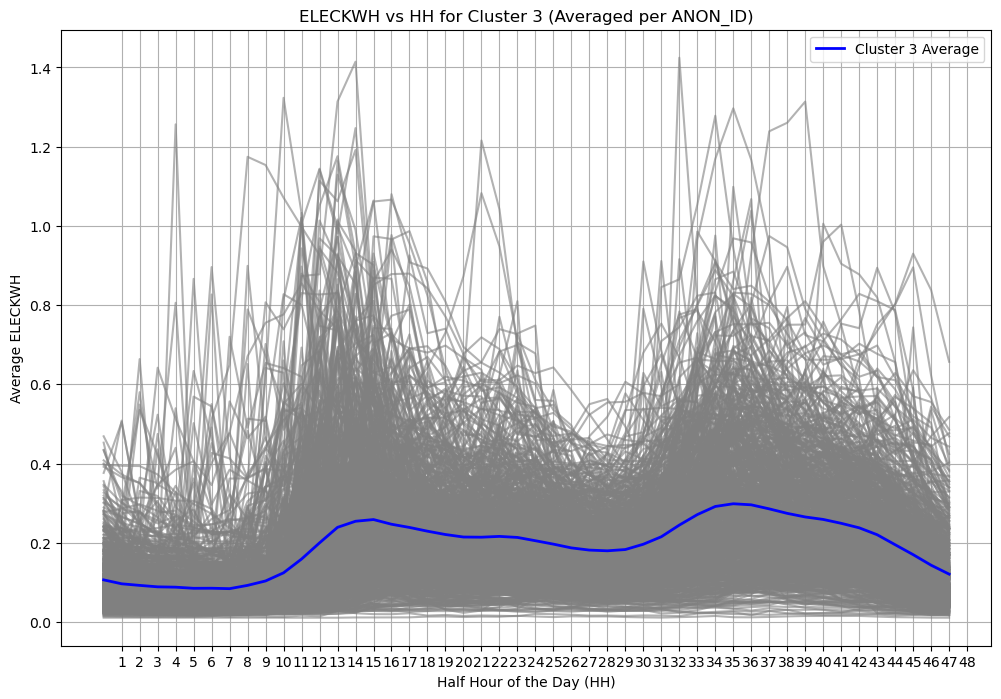

In [68]:
import matplotlib.pyplot as plt

# Filter the data for Cluster 3
cluster_3_data = df_with_clusters[df_with_clusters['Cluster'] == 1]

# Calculate the average ELECKWH per HH for each ANON_ID
cluster_3_avg_by_anon = (
    cluster_3_data.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot all ANON_IDs in grey
plt.figure(figsize=(12, 8))
for anon_id in cluster_3_avg_by_anon['ANON_ID'].unique():
    anon_data = cluster_3_avg_by_anon[cluster_3_avg_by_anon['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.6)

# Calculate the cluster average ELECKWH per HH
cluster_3_avg = (
    cluster_3_avg_by_anon.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the cluster average in blue
plt.plot(cluster_3_avg['HH'], cluster_3_avg['ELECKWH'], color='blue', linewidth=2, label='Cluster 3 Average')

# Plot details
plt.title('ELECKWH vs HH for Cluster 3 (Averaged per ANON_ID)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


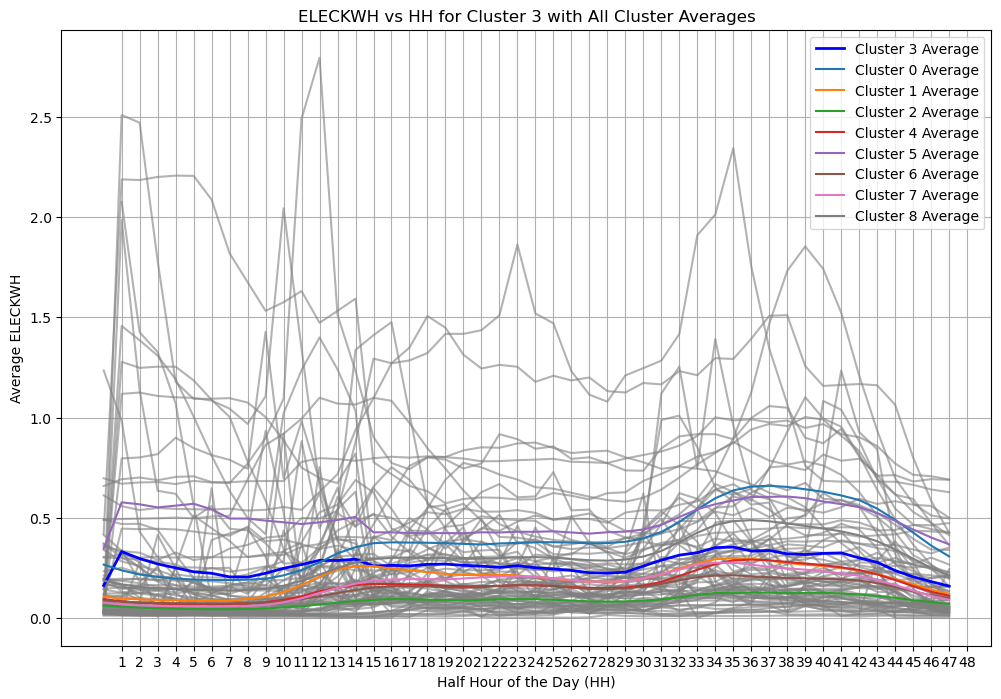

In [69]:
import matplotlib.pyplot as plt

# Filter the data for Cluster 3
cluster_3_data = df_with_clusters[df_with_clusters['Cluster'] == 3]

# Calculate the average ELECKWH per HH for each ANON_ID in Cluster 3
cluster_3_avg_by_anon = (
    cluster_3_data.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Calculate the average ELECKWH per HH for all clusters
all_clusters_avg = (
    df_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot all ANON_IDs in Cluster 3 in grey
plt.figure(figsize=(12, 8))
for anon_id in cluster_3_avg_by_anon['ANON_ID'].unique():
    anon_data = cluster_3_avg_by_anon[cluster_3_avg_by_anon['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.6)

# Plot the average for Cluster 3 in blue
cluster_3_avg = (
    cluster_3_avg_by_anon.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)
plt.plot(cluster_3_avg['HH'], cluster_3_avg['ELECKWH'], color='blue', linewidth=2, label='Cluster 3 Average')

# Add averages for all other clusters in different colors
cluster_colors = ['red', 'green', 'orange', 'purple', 'brown']  # Define a color palette
for cluster in all_clusters_avg['Cluster'].unique():
    if cluster != 3:  # Exclude Cluster 3 (already plotted in blue)
        cluster_data = all_clusters_avg[all_clusters_avg['Cluster'] == cluster]
        plt.plot(cluster_data['HH'], cluster_data['ELECKWH'], label=f'Cluster {cluster} Average')

# Plot details
plt.title('ELECKWH vs HH for Cluster 3 with All Cluster Averages')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


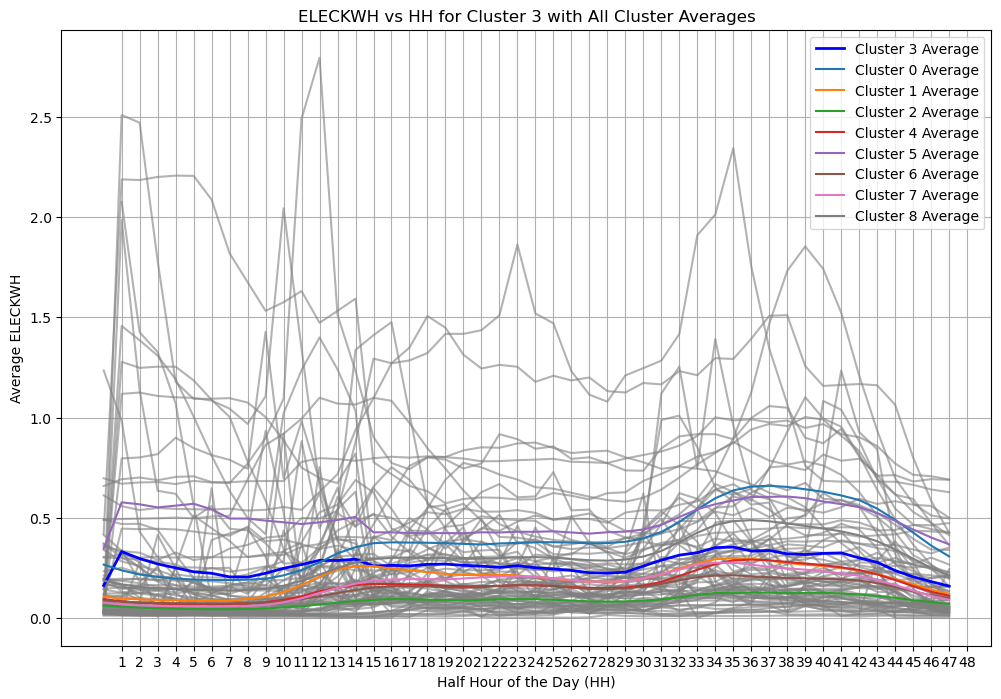

In [70]:
import matplotlib.pyplot as plt

# Filter the data for Cluster 3
cluster_3_data = df_with_clusters[df_with_clusters['Cluster'] == 3]

# Calculate the average ELECKWH per HH for each ANON_ID in Cluster 3
cluster_3_avg_by_anon = (
    cluster_3_data.groupby(['ANON_ID', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Calculate the average ELECKWH per HH for all clusters
all_clusters_avg = (
    df_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
)

# Plot all ANON_IDs in Cluster 3 in grey
plt.figure(figsize=(12, 8))
for anon_id in cluster_3_avg_by_anon['ANON_ID'].unique():
    anon_data = cluster_3_avg_by_anon[cluster_3_avg_by_anon['ANON_ID'] == anon_id]
    plt.plot(anon_data['HH'], anon_data['ELECKWH'], color='grey', alpha=0.6)

# Plot the average for Cluster 3 in blue
cluster_3_avg = (
    cluster_3_avg_by_anon.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)
plt.plot(cluster_3_avg['HH'], cluster_3_avg['ELECKWH'], color='blue', linewidth=2, label='Cluster 3 Average')

# Add averages for all other clusters in different colors
cluster_colors = ['red', 'green', 'orange', 'purple', 'brown']  # Define a color palette
for cluster in all_clusters_avg['Cluster'].unique():
    if cluster != 3:  # Exclude Cluster 3 (already plotted in blue)
        cluster_data = all_clusters_avg[all_clusters_avg['Cluster'] == cluster]
        plt.plot(cluster_data['HH'], cluster_data['ELECKWH'], label=f'Cluster {cluster} Average')

# Plot details
plt.title('ELECKWH vs HH for Cluster 3 with All Cluster Averages')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()

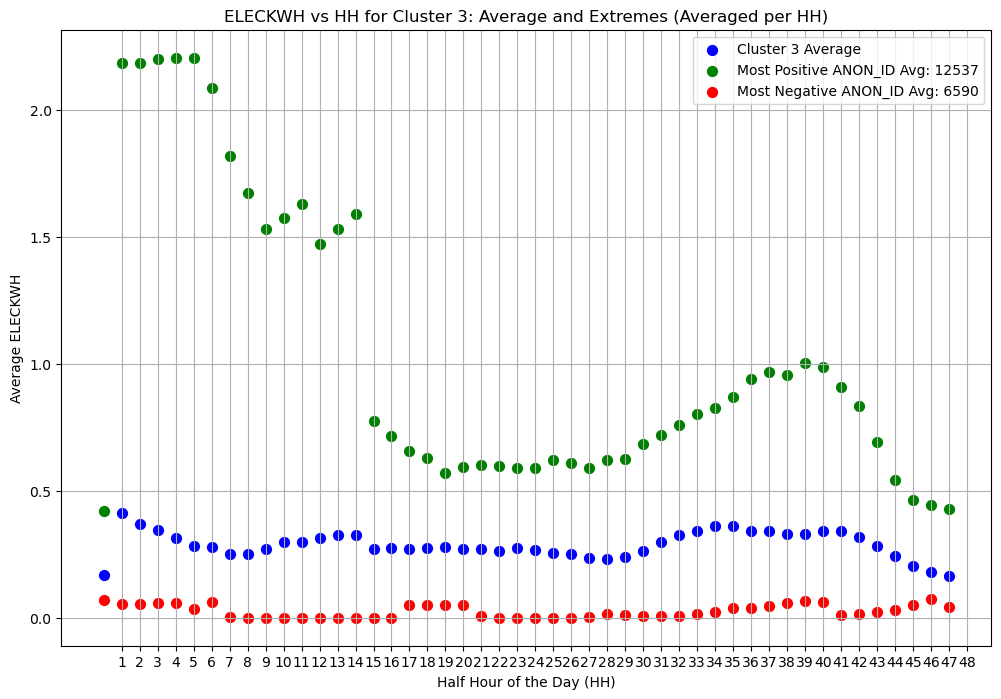

In [71]:
import matplotlib.pyplot as plt

# Filter the data for Cluster 3
cluster_3_data = df_with_clusters[df_with_clusters['Cluster'] == 3]

# Calculate the average ELECKWH per HH for Cluster 3
cluster_3_avg = (
    cluster_3_data.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge the cluster average back with the individual ANON_ID data
cluster_3_data = cluster_3_data.merge(cluster_3_avg, on='HH', how='left')

# Calculate the absolute difference from the cluster average for each ANON_ID
cluster_3_data['Difference'] = cluster_3_data['ELECKWH'] - cluster_3_data['Cluster_Avg_ELECKWH']

# Calculate the mean difference per ANON_ID
anon_diff = (
    cluster_3_data.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

# Identify the ANON_IDs with the most positive and most negative differences
most_positive_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmin(), 'ANON_ID']

# Extract data for the identified ANON_IDs
positive_anon_data = (
    cluster_3_data[cluster_3_data['ANON_ID'] == most_positive_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

negative_anon_data = (
    cluster_3_data[cluster_3_data['ANON_ID'] == most_negative_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot the cluster average
plt.scatter(cluster_3_avg['HH'], cluster_3_avg['Cluster_Avg_ELECKWH'], color='blue', label='Cluster 3 Average', s=50)

# Plot the most positive ANON_ID
plt.scatter(positive_anon_data['HH'], positive_anon_data['ELECKWH'], color='green', label=f'Most Positive ANON_ID Avg: {most_positive_anon}', s=50)

# Plot the most negative ANON_ID
plt.scatter(negative_anon_data['HH'], negative_anon_data['ELECKWH'], color='red', label=f'Most Negative ANON_ID Avg: {most_negative_anon}', s=50)

# Plot details
plt.title('ELECKWH vs HH for Cluster 3: Average and Extremes (Averaged per HH)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


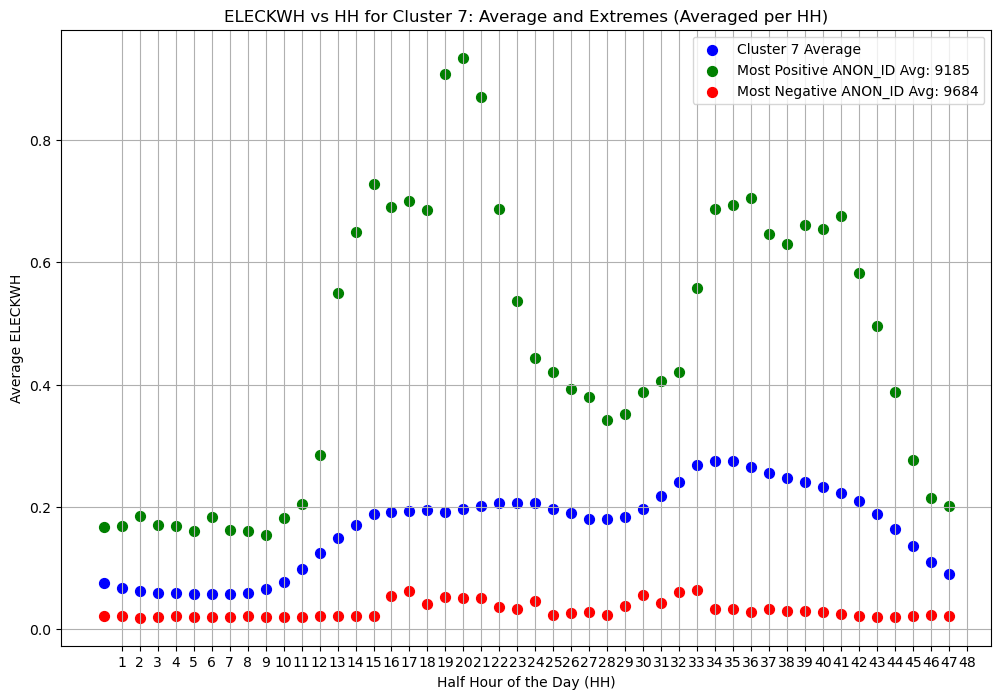

In [72]:
import matplotlib.pyplot as plt

# Filter the data for Cluster 7
cluster_7_data = df_with_clusters[df_with_clusters['Cluster'] == 7]

# Calculate the average ELECKWH per HH for Cluster 7
cluster_7_avg = (
    cluster_7_data.groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Merge the cluster average back with the individual ANON_ID data
cluster_7_data = cluster_7_data.merge(cluster_7_avg, on='HH', how='left')

# Calculate the absolute difference from the cluster average for each ANON_ID
cluster_7_data['Difference'] = cluster_7_data['ELECKWH'] - cluster_7_data['Cluster_Avg_ELECKWH']

# Calculate the mean difference per ANON_ID
anon_diff = (
    cluster_7_data.groupby('ANON_ID')['Difference']
    .mean()
    .reset_index()
    .rename(columns={'Difference': 'Mean_Difference'})
)

# Identify the ANON_IDs with the most positive and most negative differences
most_positive_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmax(), 'ANON_ID']
most_negative_anon = anon_diff.loc[anon_diff['Mean_Difference'].idxmin(), 'ANON_ID']

# Extract data for the identified ANON_IDs
positive_anon_data = (
    cluster_7_data[cluster_7_data['ANON_ID'] == most_positive_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

negative_anon_data = (
    cluster_7_data[cluster_7_data['ANON_ID'] == most_negative_anon]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot the cluster average
plt.scatter(cluster_7_avg['HH'], cluster_7_avg['Cluster_Avg_ELECKWH'], color='blue', label='Cluster 7 Average', s=50)

# Plot the most positive ANON_ID
plt.scatter(positive_anon_data['HH'], positive_anon_data['ELECKWH'], color='green', label=f'Most Positive ANON_ID Avg: {most_positive_anon}', s=50)

# Plot the most negative ANON_ID
plt.scatter(negative_anon_data['HH'], negative_anon_data['ELECKWH'], color='red', label=f'Most Negative ANON_ID Avg: {most_negative_anon}', s=50)

# Plot details
plt.title('ELECKWH vs HH for Cluster 7: Average and Extremes (Averaged per HH)')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


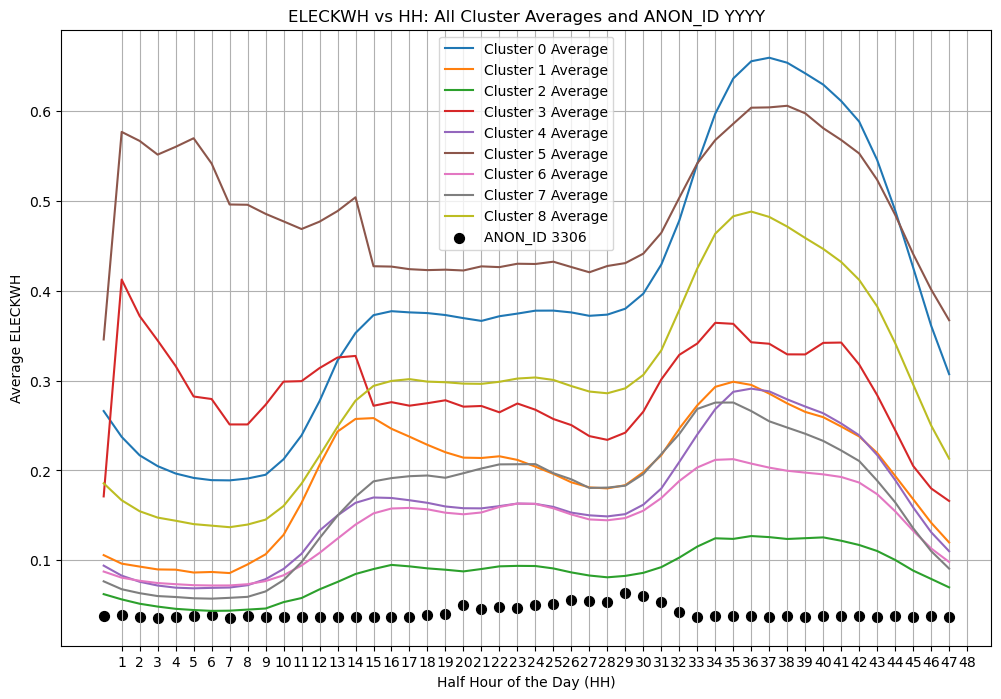

In [73]:
import matplotlib.pyplot as plt

# Calculate the average ELECKWH per HH for each cluster
cluster_avg = (
    df_with_clusters.groupby(['Cluster', 'HH'])['ELECKWH']
    .mean()
    .reset_index()
    .rename(columns={'ELECKWH': 'Cluster_Avg_ELECKWH'})
)

# Extract data for ANON_ID 3306
anon_3306_data = (
    df_with_clusters[df_with_clusters['ANON_ID'] == 2177]
    .groupby('HH')['ELECKWH']
    .mean()
    .reset_index()
)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot the cluster averages
cluster_colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'cyan']  # Define a palette for clusters
for cluster in cluster_avg['Cluster'].unique():
    cluster_data = cluster_avg[cluster_avg['Cluster'] == cluster]
    plt.plot(cluster_data['HH'], cluster_data['Cluster_Avg_ELECKWH'], label=f'Cluster {cluster} Average')

# Plot the ANON_ID 3306 data
plt.scatter(anon_3306_data['HH'], anon_3306_data['ELECKWH'], color='black', label='ANON_ID 3306', s=50)

# Plot details
plt.title('ELECKWH vs HH: All Cluster Averages and ANON_ID YYYY')
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average ELECKWH')
plt.xticks(range(1, 49))  # HH typically ranges from 1 to 48
plt.legend()
plt.grid(True)
plt.show()


In [74]:
# Filter the data for ANON_ID = 3306
anon_3306_data = df100selected_features[df100selected_features['ANON_ID'] == 2177]

# Compute the mean values of the features for ANON_ID = 3306
anon_3306_means = anon_3306_data.mean(numeric_only=True).to_frame().T

# Add a column to identify it as ANON_ID = 3306
anon_3306_means['Cluster'] = 'ANON_ID YYYY'

# Reset index for the computed means to match cluster_means
anon_3306_means.reset_index(drop=True, inplace=True)

# Append the row to the cluster_means DataFrame
cluster_means_with_anon = pd.concat([cluster_means, anon_3306_means], ignore_index=True)


NameError: name 'df100selected_features' is not defined

In [ ]:
cluster_means_with_anon


,Cluster,RME_bre,RME_eve,RME_day,RME_nig,RSD_avg,WScore,Avg_Daily_Max_Min_Diff,Avg_Day_Eve,ANON_ID,Cluster_HC
0,0,1.200000,1.190000,1.180000,0.560000,98.000000,0.030000,0.530000,0.130000,NaN,NaN
1,1,1.060000,1.380000,1.040000,0.450000,113.810000,0.080000,0.710000,0.220000,NaN,NaN
2,2,1.030000,1.360000,1.130000,0.590000,90.170000,0.070000,0.700000,0.190000,NaN,NaN
3,3,1.050000,1.240000,1.070000,0.720000,56.410000,-0.010000,0.350000,0.150000,NaN,NaN
4,4,0.870000,0.950000,0.800000,1.270000,104.560000,0.070000,1.260000,0.220000,NaN,NaN
5,5,0.990000,1.440000,1.010000,0.640000,82.090000,0.100000,0.780000,0.290000,NaN,NaN
6,6,1.010000,1.420000,1.080000,0.580000,68.260000,0.050000,1.030000,0.480000,NaN,NaN
7,7,1.250000,1.250000,1.010000,0.640000,120.700000,0.040000,1.150000,0.220000,NaN,NaN
8,8,0.990000,1.380000,1.080000,0.640000,71.300000,0.050000,1.030000,0.380000,NaN,NaN
9,ANON_ID YYYY,0.984436,0.945091,1.162657,0.923318,115.210844,-0.080812,0.061209,0.027404,2177.0,10.0


In [ ]:
anon_ids_to_drop


[378,
 398,
 410,
 477,
 629,
 681,
 839,
 924,
 1221,
 1319,
 1355,
 1386,
 1436,
 1455,
 1458,
 1551,
 1571,
 1614,
 1664,
 1771,
 1846,
 1946,
 2002,
 2158,
 2207,
 2241,
 2369,
 2443,
 2558,
 2602,
 2629,
 2733,
 2846,
 3166,
 3212,
 3300,
 3439,
 3649,
 3928,
 4228,
 4280,
 4711,
 4827]

### Section 2.3.9 Apply k-means because there is not Gaussian Distribution on each feature